# Math 189 - Prediction on College Student Dropouts
## Link to Video:

## Names

- Chenyu Li
- Rohan Meserve
- Zhouzhen Pan
- Rena Wu
- Jacqueline Zhong
- Bobby Zhu


## Abstract
Studying students’ dropout and success can help us to conduct early intervention which can help students who are underperforming to be helped on time. Also, knowing the key features of success and failure, universities can allocate their resources more effectively to help students. Lastly, knowing these facts, the government and education institutes can develop policies to address educational disparities.

Our dataset is pulled from the UC Irvine Machine Learning Repository. This website can be considered a reliable source, and is known for staging a wide variety of datasets for use in machine learning. This suits the needs of this project, because datasets used in ML are ideally large and generally suitable for statistical analysis. [About](https://archive.ics.uci.edu/about)

This specific dataset was created by the contributors of [“Early Prediction of student’s Performance in Higher Education: A Case Study”](https://link.springer.com/chapter/10.1007/978-3-030-72657-7_16).

## Import Packages

In [28]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf

## Data Overview

#### Column descriptions at https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [30]:
df = pd.read_csv('data.csv', sep=';')

In [31]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [32]:
# select only Graduates and Dropouts
df = df[df['Target'] != 'Enrolled']

In [33]:
for i in range(len(df.columns)):
    print('Column ' + str(i) + ': ' + df.columns[i])

Column 0: Marital status
Column 1: Application mode
Column 2: Application order
Column 3: Course
Column 4: Daytime/evening attendance	
Column 5: Previous qualification
Column 6: Previous qualification (grade)
Column 7: Nacionality
Column 8: Mother's qualification
Column 9: Father's qualification
Column 10: Mother's occupation
Column 11: Father's occupation
Column 12: Admission grade
Column 13: Displaced
Column 14: Educational special needs
Column 15: Debtor
Column 16: Tuition fees up to date
Column 17: Gender
Column 18: Scholarship holder
Column 19: Age at enrollment
Column 20: International
Column 21: Curricular units 1st sem (credited)
Column 22: Curricular units 1st sem (enrolled)
Column 23: Curricular units 1st sem (evaluations)
Column 24: Curricular units 1st sem (approved)
Column 25: Curricular units 1st sem (grade)
Column 26: Curricular units 1st sem (without evaluations)
Column 27: Curricular units 2nd sem (credited)
Column 28: Curricular units 2nd sem (enrolled)
Column 29: Cur

## Data Cleaning

In [7]:
# find null values
df.isnull().sum().sum()
# no nulls found; the dataset's creators did all necessary cleaning

0

Dataset creators' comment on cleaning: 'We performed a rigorous data preprocessing to handle data from anomalies, unexplainable outliers, and missing values.'

## Exploratory Data Analysis

#### Columns 1 -> 18; run prior to preprocessing

In [9]:
# color dictionary
colors = {'Graduate': 'darkgreen', 'Dropout': 'darkred'}

In [10]:
# print #uniqe values per column
for i in range(16):
    print('Columns #' + str(i) + '; ' + df.columns[i] + ' has ' + str(len(df[df.columns[i]].unique())) + ' unique values')

Columns #0; Marital status has 6 unique values
Columns #1; Application mode has 18 unique values
Columns #2; Application order has 7 unique values
Columns #3; Course has 17 unique values
Columns #4; Daytime/evening attendance	 has 2 unique values
Columns #5; Previous qualification has 17 unique values
Columns #6; Previous qualification (grade) has 101 unique values
Columns #7; Nacionality has 19 unique values
Columns #8; Mother's qualification has 29 unique values
Columns #9; Father's qualification has 34 unique values
Columns #10; Mother's occupation has 29 unique values
Columns #11; Father's occupation has 42 unique values
Columns #12; Admission grade has 602 unique values
Columns #13; Displaced has 2 unique values
Columns #14; Educational special needs has 2 unique values
Columns #15; Debtor has 2 unique values


In [10]:
# categorical columns are num 0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14; use bar charts
# continuous columns are num 6, 12; use histogram

### Column 0: Marital Status

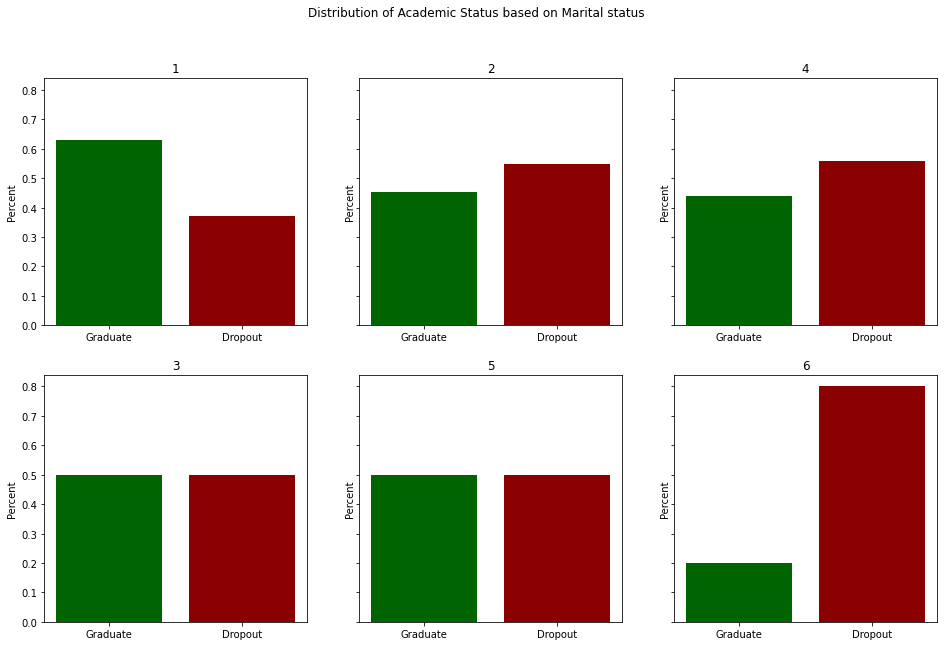

In [11]:
# select subset of dataset
col = df.columns[0]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 3
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 10), sharey=True)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: significantly less graduates in status 6, significantly more enrolled in status 3**

Likely an influential feature

### Column 1: Application Mode

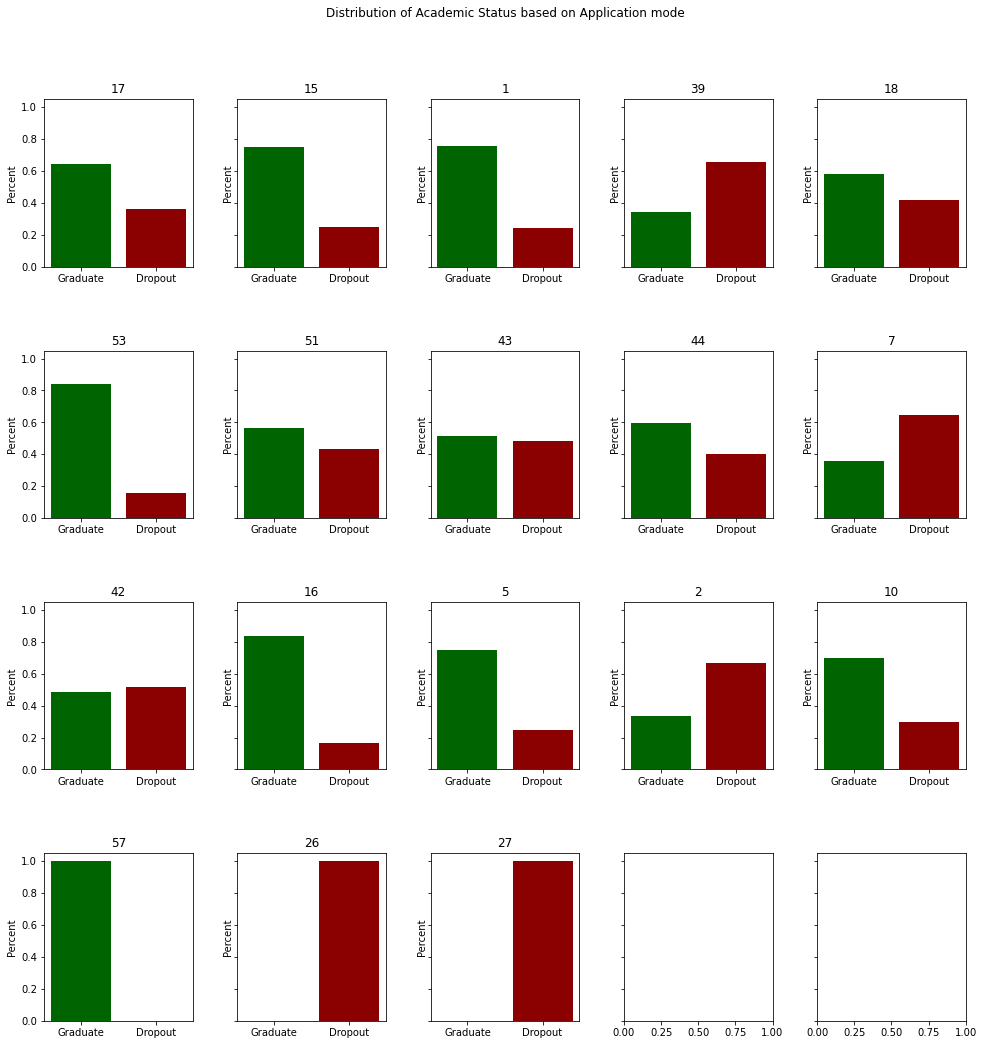

In [12]:
# select subset of dataset
col = df.columns[1]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 4
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant fluctuations within this feature**

Likely an influential feature

### Column 2: Application Order

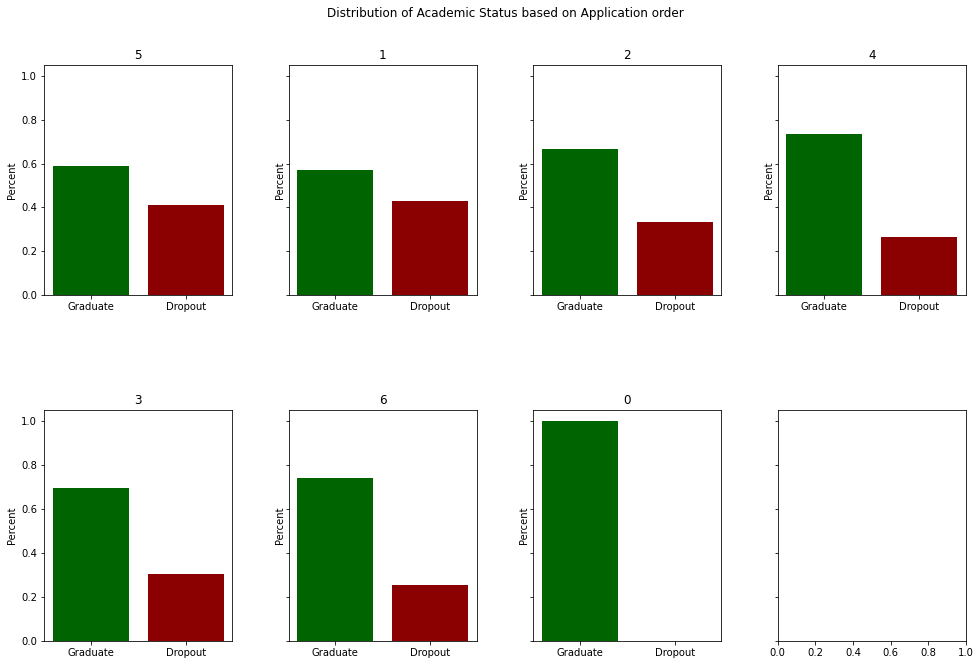

In [13]:
# select subset of dataset
col = df.columns[2]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 10), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Not much fluctuation within this feature**

Probably not an influential feature

### Column 3: Course

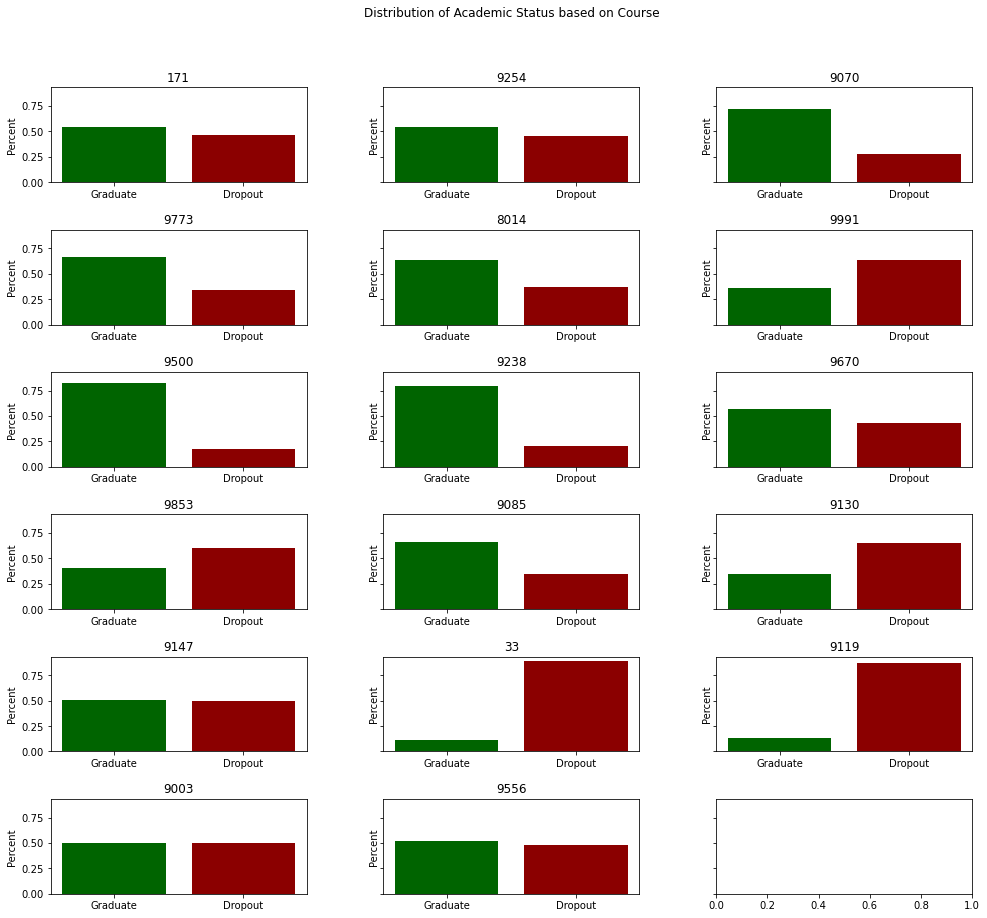

In [14]:
# select subset of dataset
col = df.columns[3]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 3
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 14), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant difference within some feature types**

Likely an influential feature

### Column 4: Daytime/Evening attendance

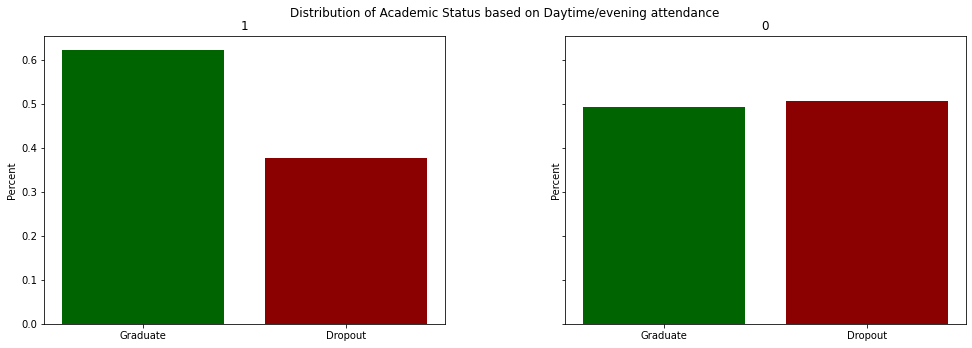

In [15]:
# select subset of dataset
col = df.columns[4]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col[:-1])
plt.show()

**Observation: Not much fluctuation within this feature**

Probably not an influential feature

### Column 5: Previous Qualification

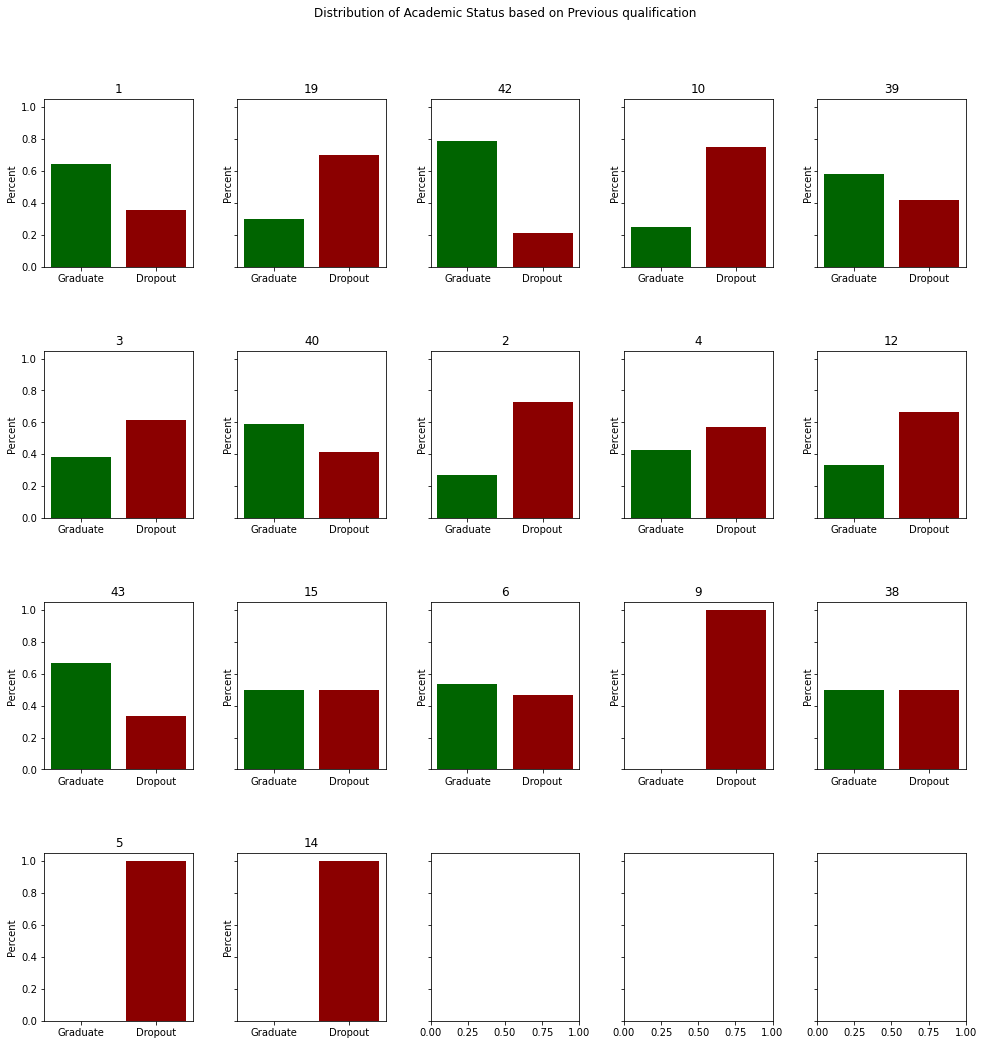

In [16]:
# select subset of dataset
col = df.columns[5]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 4
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant fluctuation within this feature**

Probably an influential feature

### Column 6: Previous Qualification (grade)

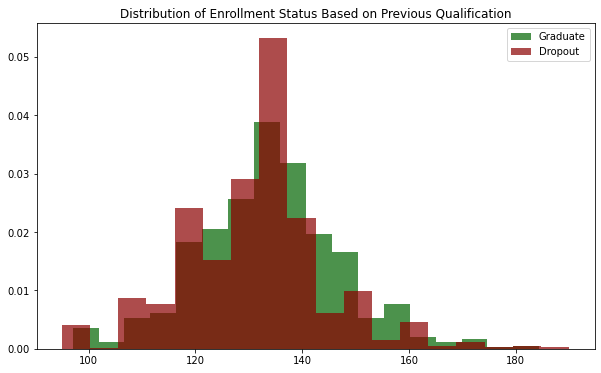

In [17]:
col = df.columns[6]

plt.figure(figsize=(10,6))
feature_ser = df[col]
for target_val in ['Graduate', 'Dropout']:
    plt.hist(feature_ser[df['Target'] == target_val], color=colors[target_val], alpha=.7, bins=18, label=target_val, density=True)
plt.title('Distribution of Enrollment Status Based on Previous Qualification')
plt.legend()
plt.show()

**Observation: Not much fluctuation within this feature (distributions are nearly the same)**

Probably not an influential feature

### Column 7: Nationality

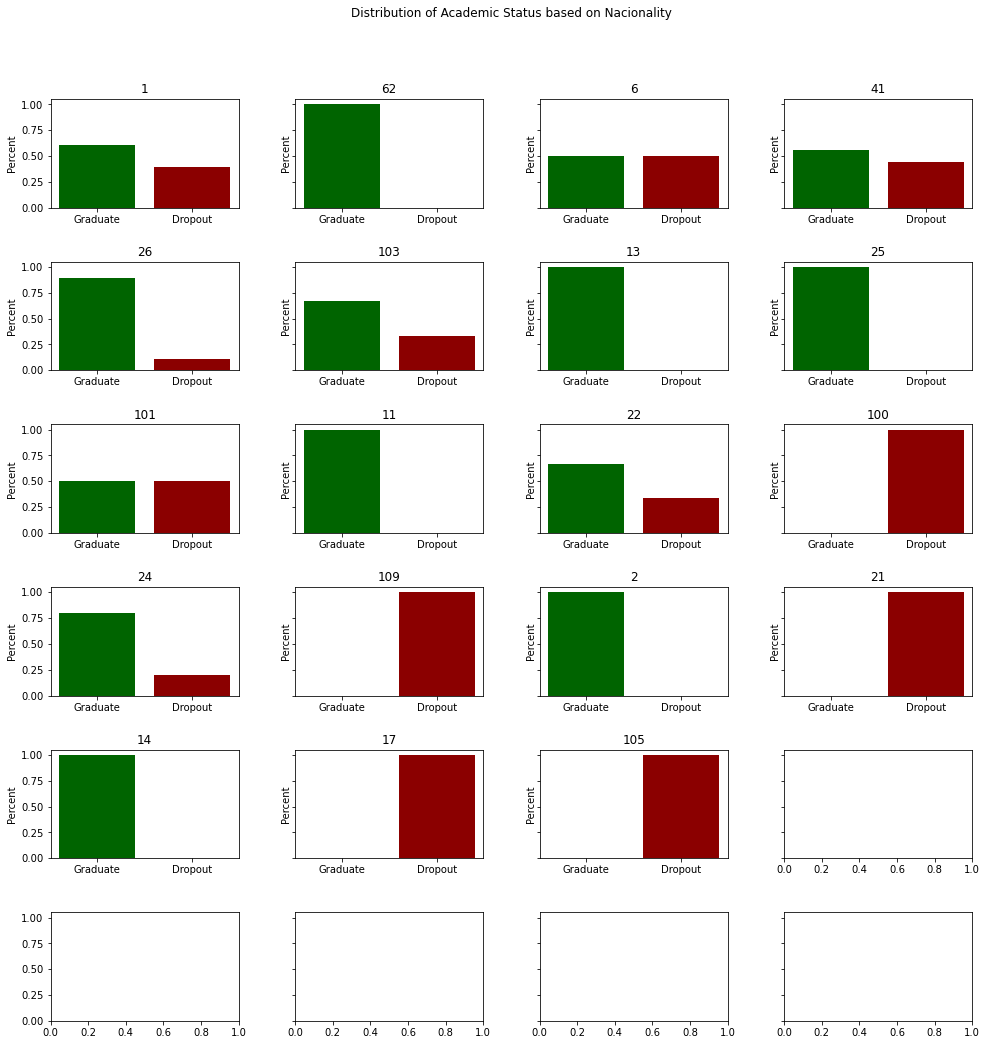

In [18]:
# select subset of dataset
col = df.columns[7]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant differences within this feature (but also unequal representation of each type of nationality)**

Maybe an influential feature

### Column 8: Mother's Qualification

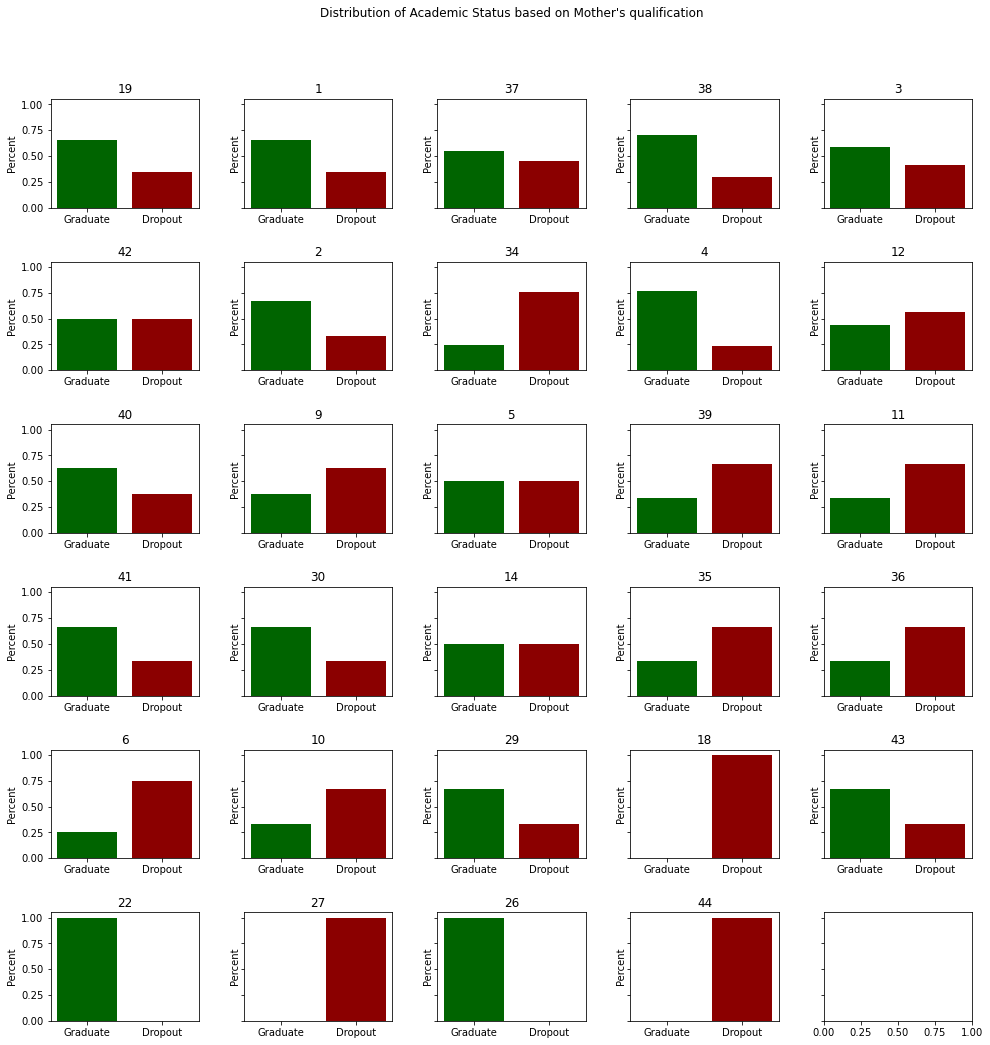

In [19]:
# select subset of dataset
col = df.columns[8]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Generally few fluctuations; large variety draws concern to representation of each type of feature (mother's qualification) within whole dataset**

Probably not an influential feature

### Column 9: Father's Qualification

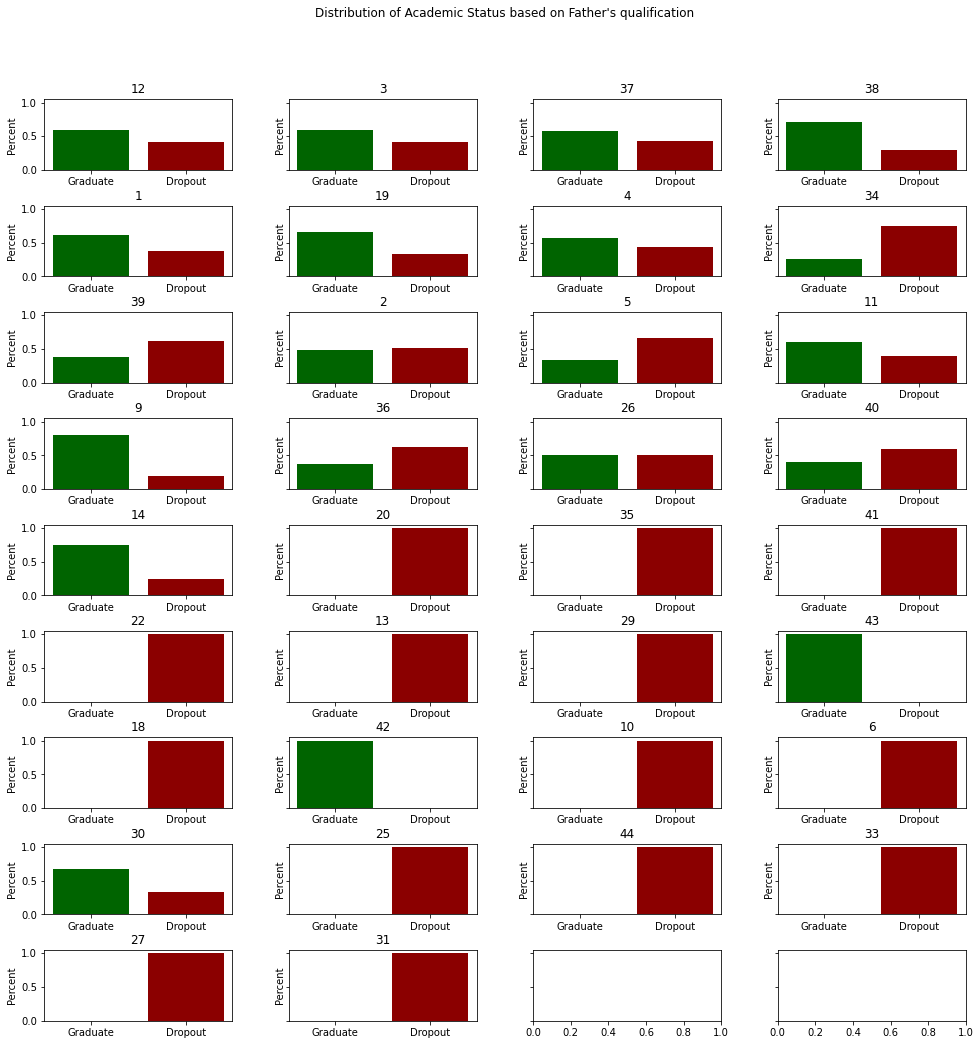

In [20]:
# select subset of dataset
col = df.columns[9]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 9
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Lots of fluctuations; large variety draws concern to representation of each type of feature (father's qualification) within whole dataset. Lots of 100% dropout rates within types of features**

Likely an influential feature

### Column 10: Mother's Occupation

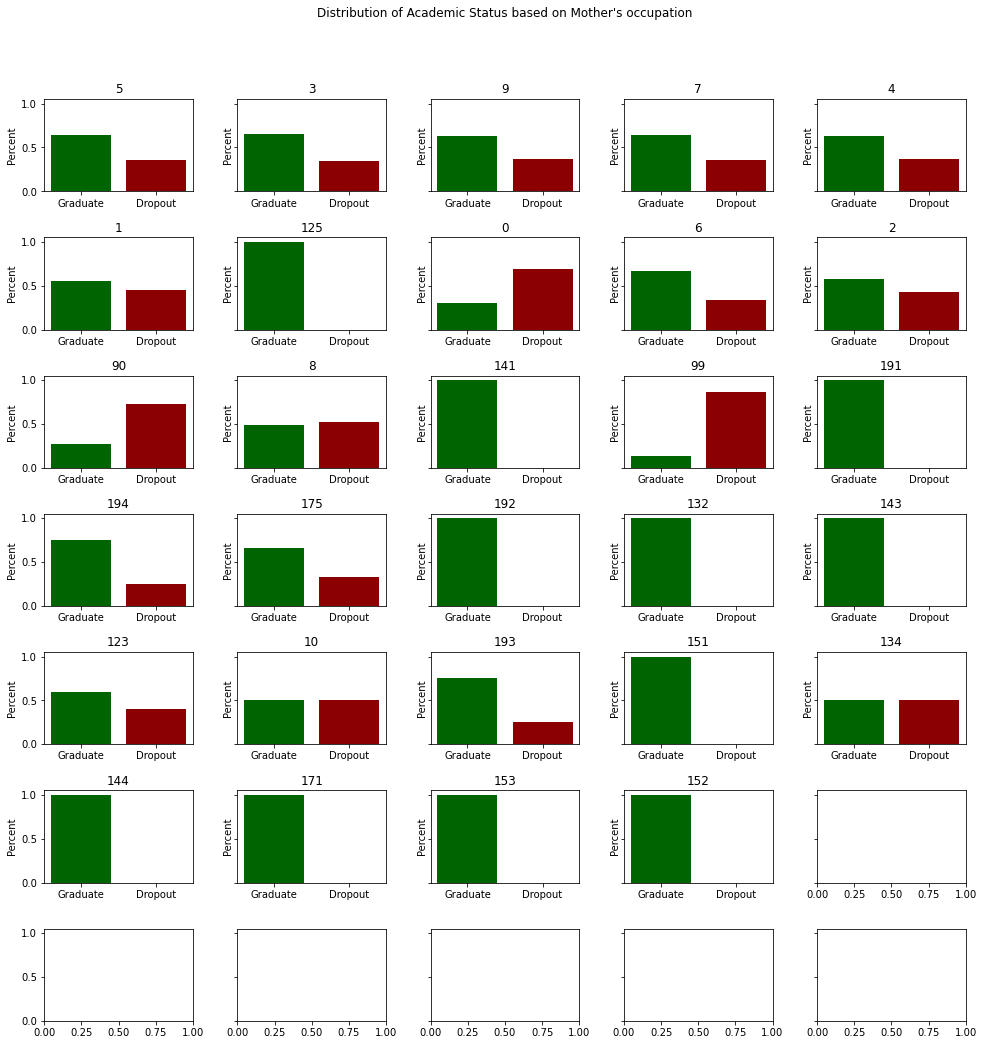

In [21]:
# select subset of dataset
col = df.columns[10]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 7
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Lots of fluctuations; large variety draws concern to representation of each type of feature (mother's occupation) within whole dataset**

Likely an influential feature

### Column 11: Father's Occupation

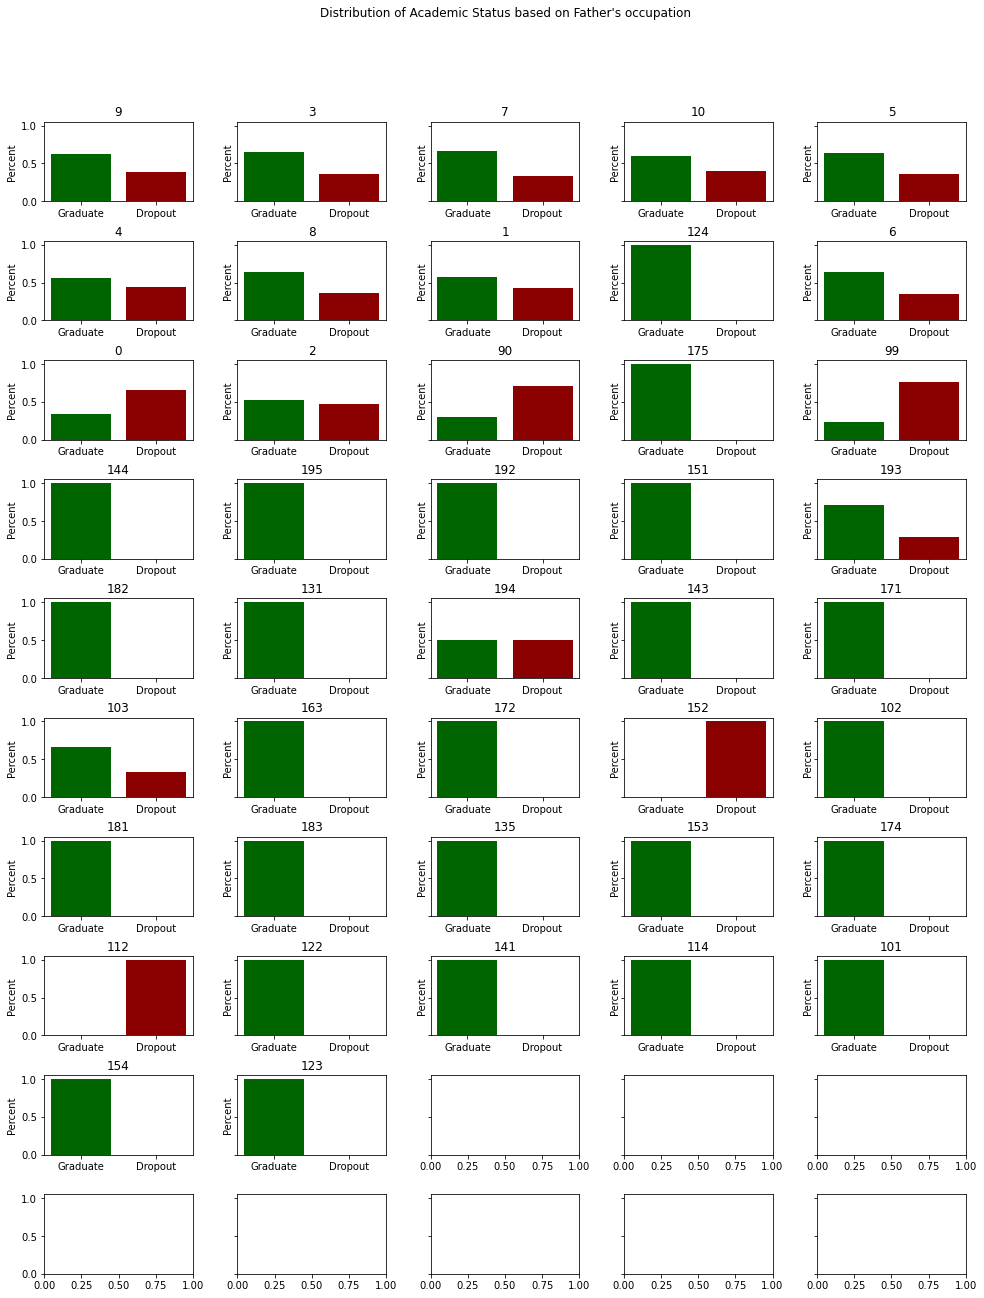

In [22]:
# select subset of dataset
col = df.columns[11]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 10
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 20), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Lots of fluctuations; large variety draws concern to representation of each type of feature (mother's occupation) within whole dataset. Lots of 100% graduation rates based on types of feature.**

Likely an influential feature

### Column 12: Admission Grade

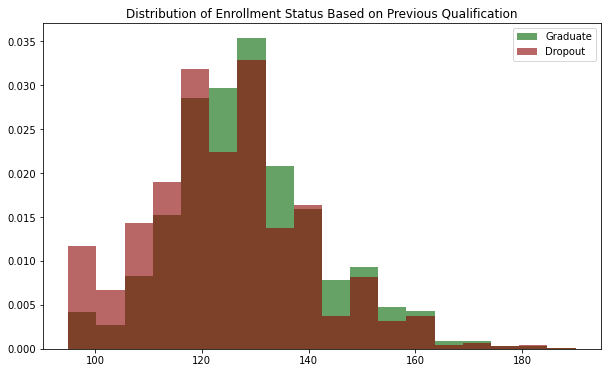

In [23]:
col = df.columns[12]

plt.figure(figsize=(10,6))
feature_ser = df[col]
for target_val in ['Graduate', 'Dropout']:
    plt.hist(feature_ser[df['Target'] == target_val], color=colors[target_val], alpha=.6, bins=18, label=target_val, density=True)
plt.title('Distribution of Enrollment Status Based on Previous Qualification')
plt.legend()
plt.show()

**Observation: Very similar distribution within each enrollment status**

Probably not an influential feature

### Column 13: Displaced

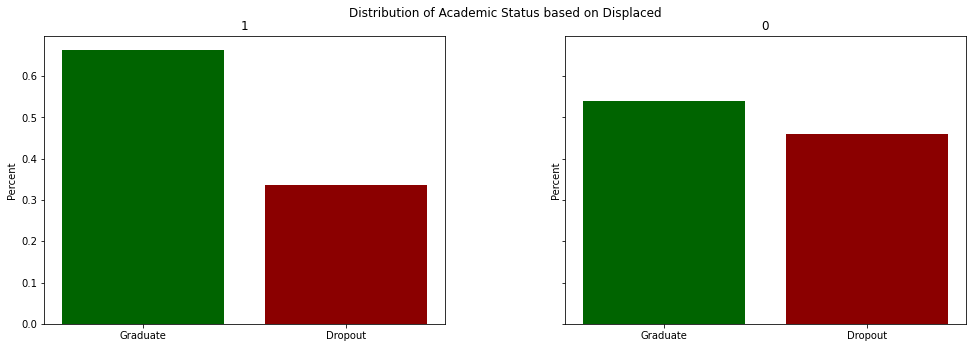

In [24]:
# select subset of dataset
col = df.columns[13]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Very similar distributions**

Probably not an influential feature

### Column 14: Education Special Needs

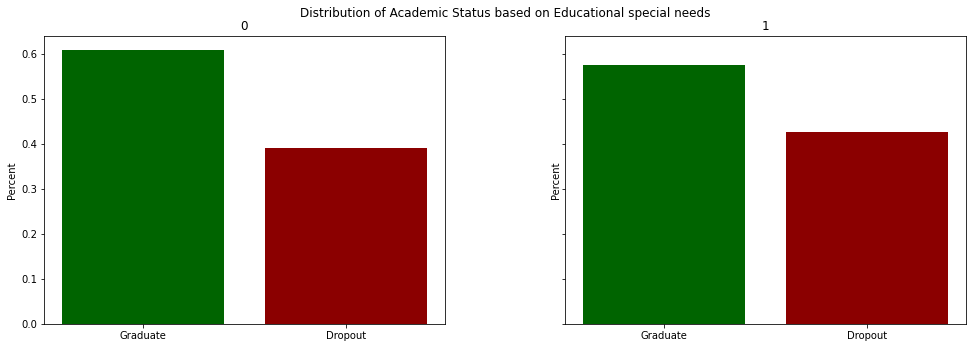

In [25]:
# select subset of dataset
col = df.columns[14]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Very similar distributions.**

Probably not an influential feature

### Column 15: Debtor

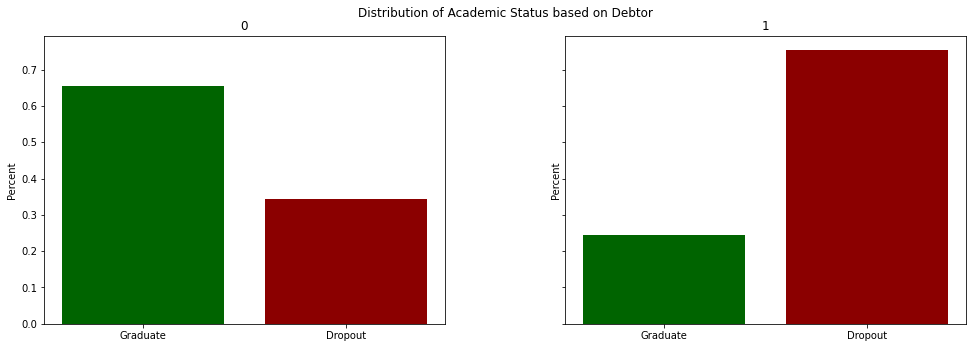

In [26]:
# select subset of dataset
col = df.columns[15]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Very different distributions.**

Very likely to be an influential feature

# Summary on EDA for Columns 0-15:

- Columns #0; Marital status : likely
- Columns #1; Application mode : Likely
- Columns #2; Application order : Unlikely
- Columns #3; Course : Likely
- Columns #4; Daytime/evening attendance : Unlikely
- Columns #5; Previous qualification : Likely
- Columns #6; Previous qualification (grade) : Unlikely
- Columns #7; Nationality : Likely
- Columns #8; Mother's qualification : Unlikely
- Columns #9; Father's qualification : Likely
- Columns #10; Mother's occupation : Likely
- Columns #11; Father's occupation : Likely
- Columns #12; Admission grade : Unlikely
- Columns #13; Displaced : Unlikely
- Columns #14; Educational special needs : Unlikely
- Columns #15; Debtor : Likely


In [27]:
# print #uniqe values per column
for i in range(16,36):
    print('Columns #' + str(i) + '; ' + df.columns[i] + ' has ' + str(len(df[df.columns[i]].unique())) + ' unique values')

Columns #16; Tuition fees up to date has 2 unique values
Columns #17; Gender has 2 unique values
Columns #18; Scholarship holder has 2 unique values
Columns #19; Age at enrollment has 46 unique values
Columns #20; International has 2 unique values
Columns #21; Curricular units 1st sem (credited) has 21 unique values
Columns #22; Curricular units 1st sem (enrolled) has 23 unique values
Columns #23; Curricular units 1st sem (evaluations) has 35 unique values
Columns #24; Curricular units 1st sem (approved) has 23 unique values
Columns #25; Curricular units 1st sem (grade) has 752 unique values
Columns #26; Curricular units 1st sem (without evaluations) has 11 unique values
Columns #27; Curricular units 2nd sem (credited) has 19 unique values
Columns #28; Curricular units 2nd sem (enrolled) has 22 unique values
Columns #29; Curricular units 2nd sem (evaluations) has 29 unique values
Columns #30; Curricular units 2nd sem (approved) has 20 unique values
Columns #31; Curricular units 2nd sem

In [28]:
# categorical columns are num 16,17,18,20,21,22,23,24,26,27,28,29,30,32,33,34,35; use bar charts
# continuous columns are num 19,25,31; use histogram

### Column 16: Tuition fees up to date

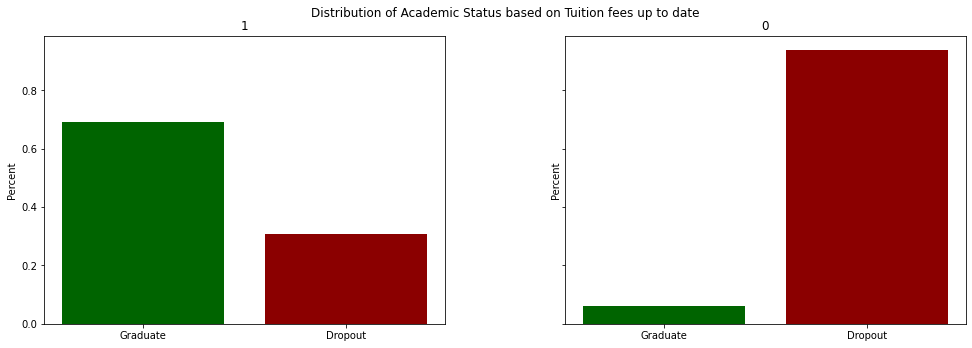

In [29]:
# select subset of dataset
col = df.columns[16]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**observation: significant difference with features**

Likely an influential feature

### Columns 17; Gender

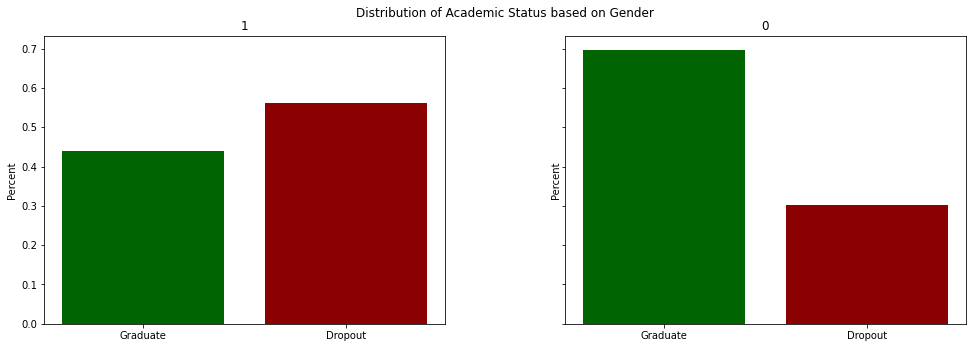

In [30]:
# select subset of dataset
col = df.columns[17]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**observation: Not much fluctuation within this feature**

Probably not an influential feature

### Columns 18: Scholarship holder

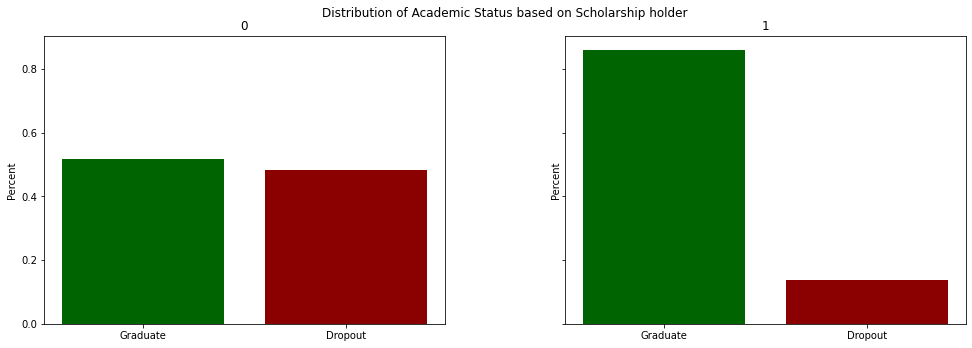

In [31]:
# select subset of dataset
col = df.columns[18]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**observation: significant difference with features**

Likely an influential feature

### Columns 19: Age at enrollment

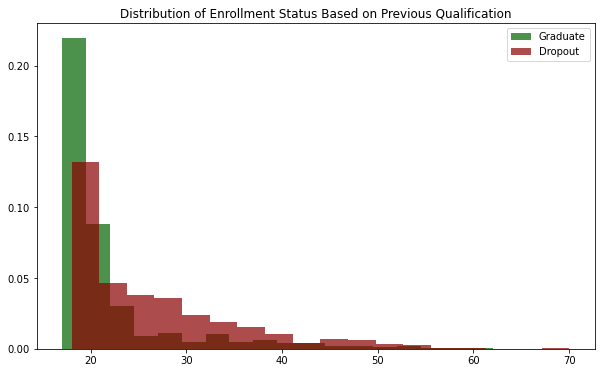

In [32]:
col = df.columns[19]

plt.figure(figsize=(10,6))
feature_ser = df[col]
for target_val in ['Graduate', 'Dropout']:
    plt.hist(feature_ser[df['Target'] == target_val], color=colors[target_val], alpha=.7, bins=18, label=target_val, density=True)
plt.title('Distribution of Enrollment Status Based on Previous Qualification')
plt.legend()
plt.show()

**Observation: Not much fluctuation within this feature (distributions are nearly the same)**

Probably not an influential feature

### Columns 20: International

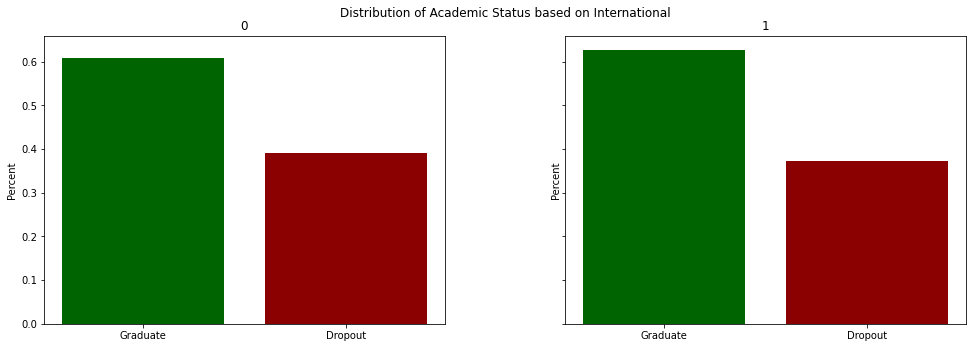

In [33]:
# select subset of dataset
col = df.columns[20]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**observation: Not much fluctuation within this feature**

Probably not an influential feature

### Columns 21: Curricular units 1st sem (credited)

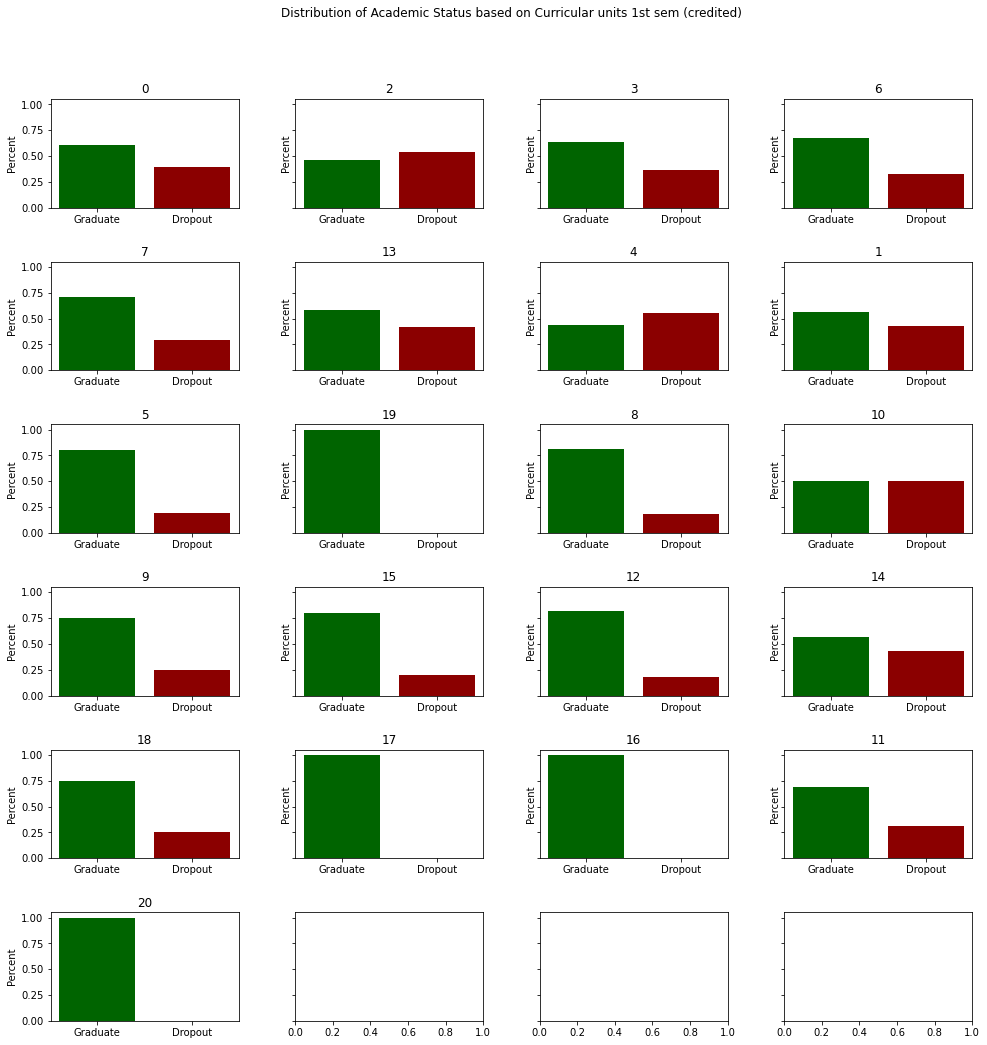

In [34]:
# select subset of dataset
col = df.columns[21]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**observation: Not much fluctuation within this feature**

Probably not an influential feature

### Columns 22: Curricular units 1st sem (enrolled)

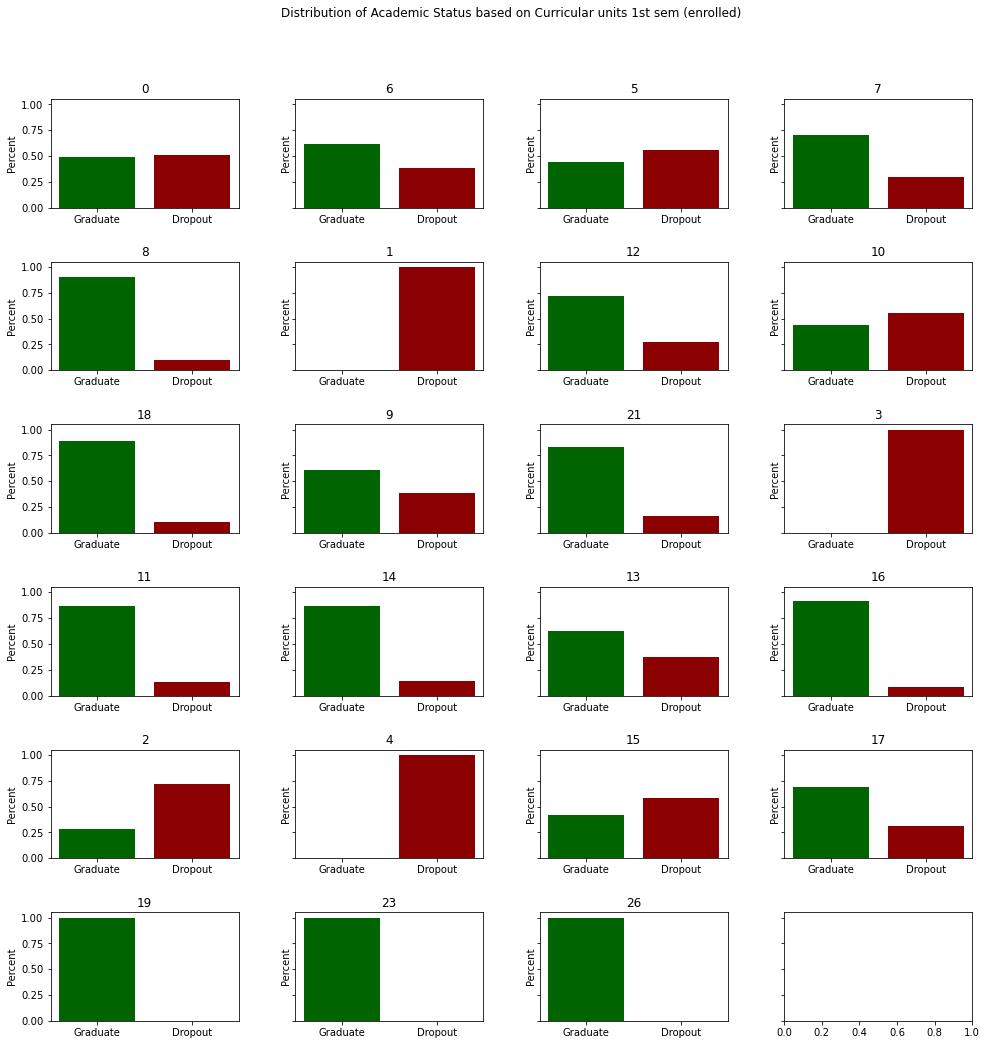

In [35]:
# select subset of dataset
col = df.columns[22]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant difference within some feature types**

Likely an influential feature

### Columns 23: Curricular units 1st sem (evaluations)

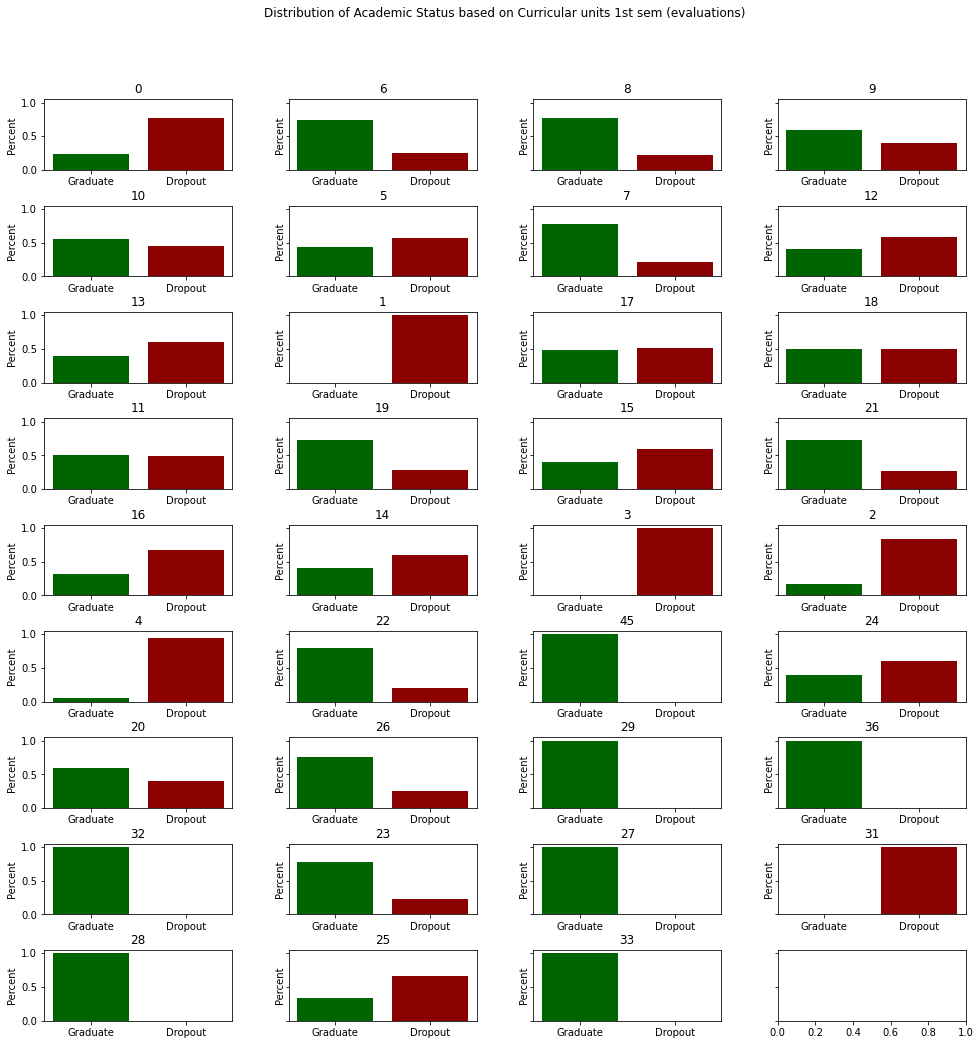

In [36]:
# select subset of dataset
col = df.columns[23]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 9
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant difference within some feature types**

Likely an influential feature

### Columns 24: Curricular units 1st sem (approved)

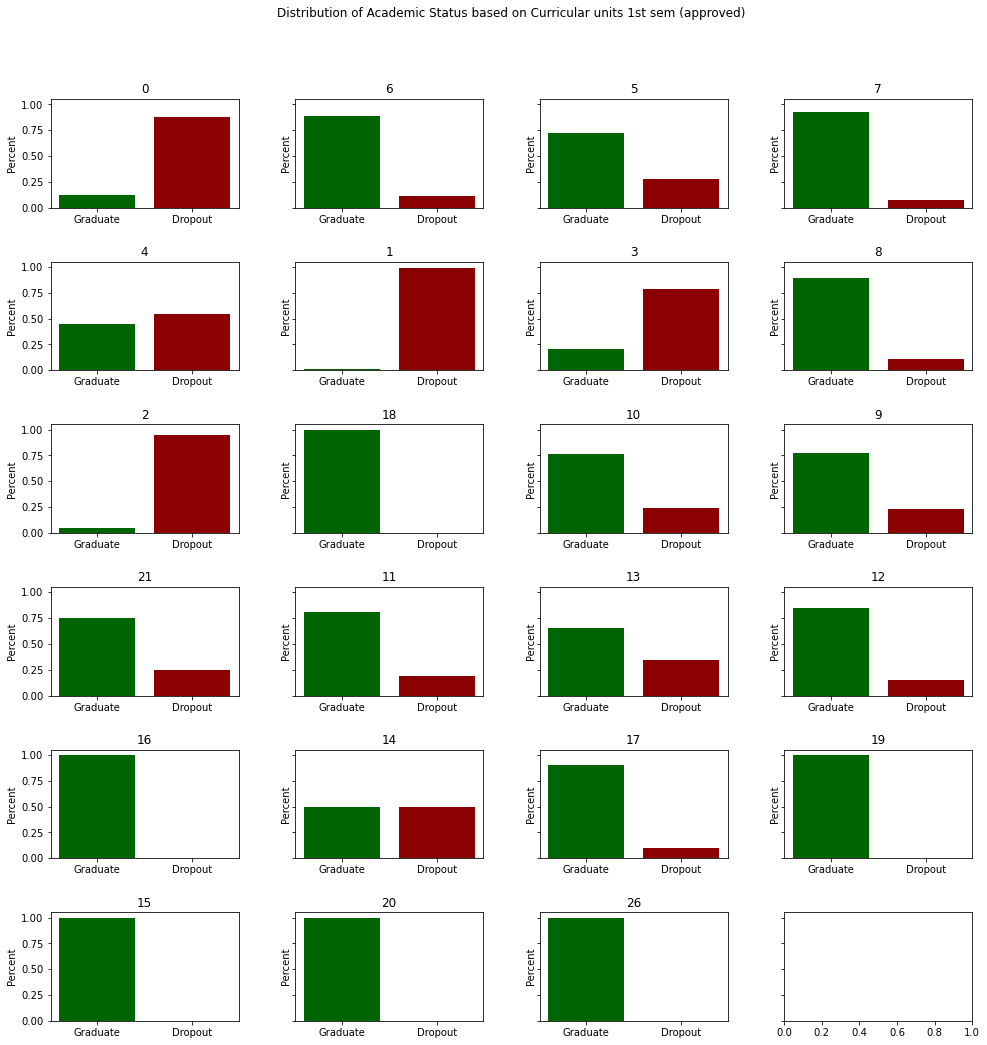

In [37]:
# select subset of dataset
col = df.columns[24]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant difference within some feature types**

Likely an influential feature

### Columns 25: Curricular units 1st sem (grade)

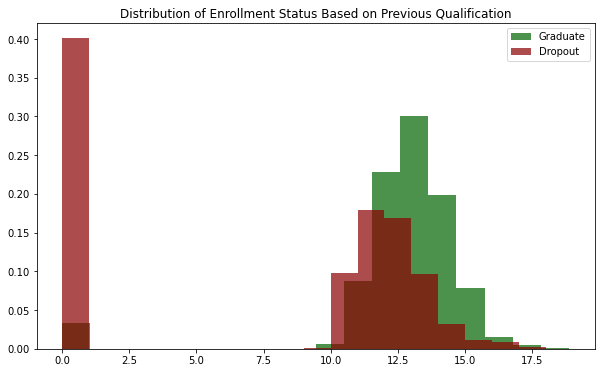

In [38]:
col = df.columns[25]

plt.figure(figsize=(10,6))
feature_ser = df[col]
for target_val in ['Graduate', 'Dropout']:
    plt.hist(feature_ser[df['Target'] == target_val], color=colors[target_val], alpha=.7, bins=18, label=target_val, density=True)
plt.title('Distribution of Enrollment Status Based on Previous Qualification')
plt.legend()
plt.show()

**Observation: Not much fluctuation within this feature (distributions are nearly the same)**

Probably not an influential feature

### Columns 26: Curricular units 1st sem (without evaluations)

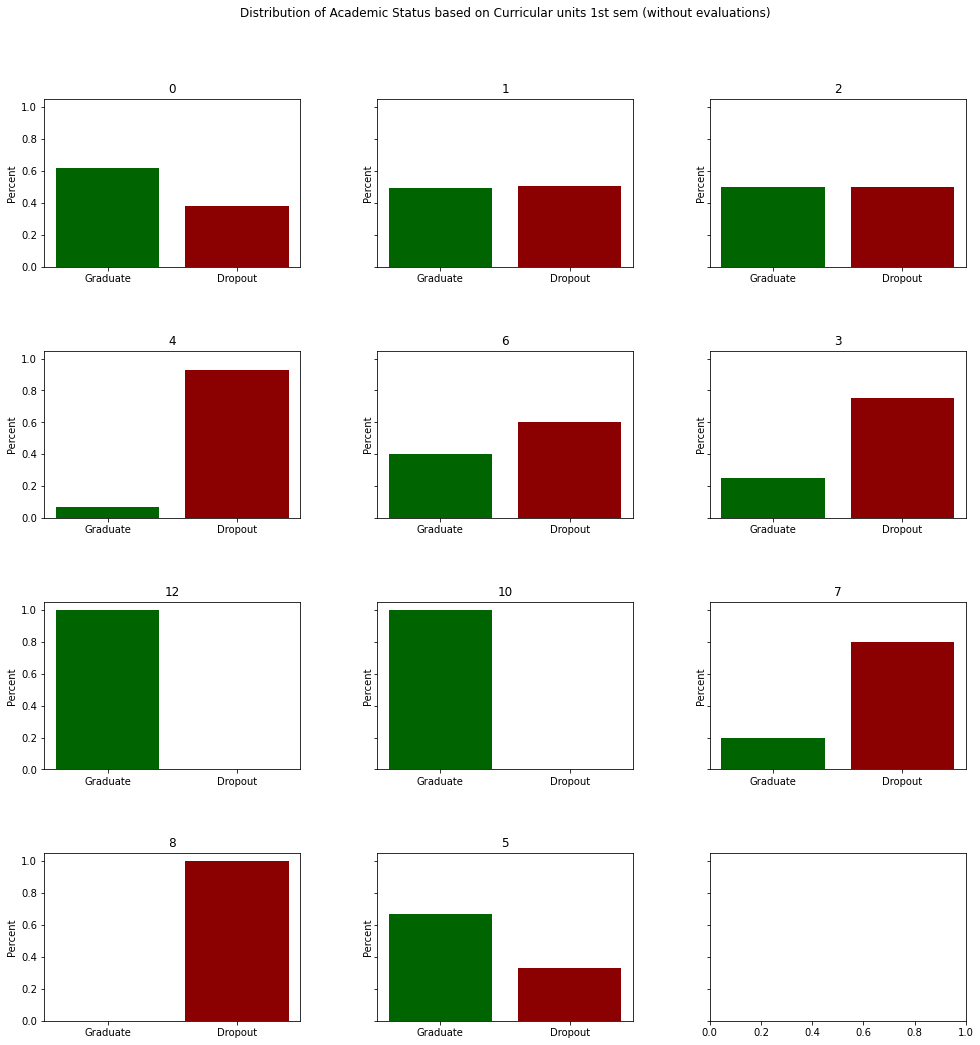

In [39]:
# select subset of dataset
col = df.columns[26]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 4
subplots_width = 3
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant difference within some feature types**

Likely an influential feature

### Columns 27: Curricular units 2nd sem (credited)

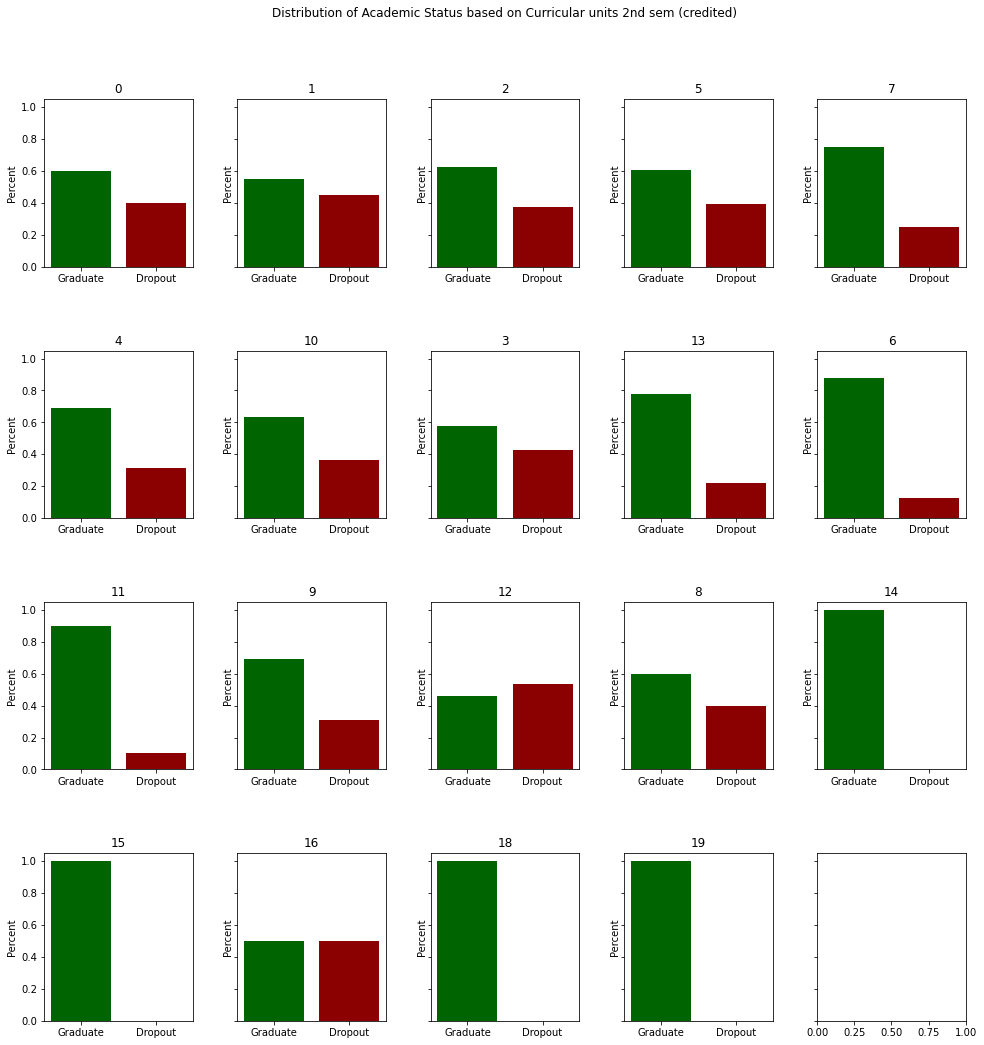

In [40]:
# select subset of dataset
col = df.columns[27]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 4
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant difference within some feature types**

Likely an influential feature

### Columns 28: Curricular units 2nd sem (enrolled)

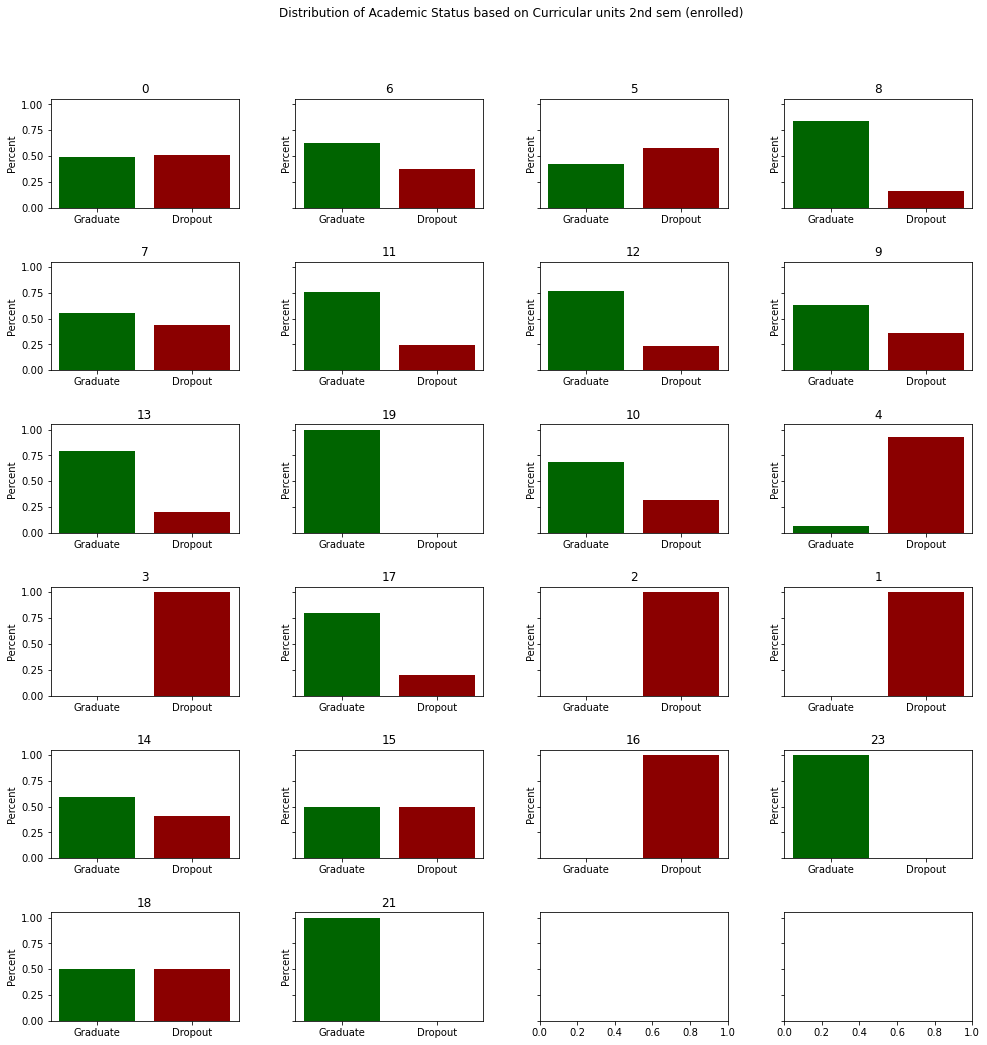

In [41]:
# select subset of dataset
col = df.columns[28]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant difference within some feature types**

Likely an influential feature

### Columns 29: Curricular units 2nd sem (evaluations)

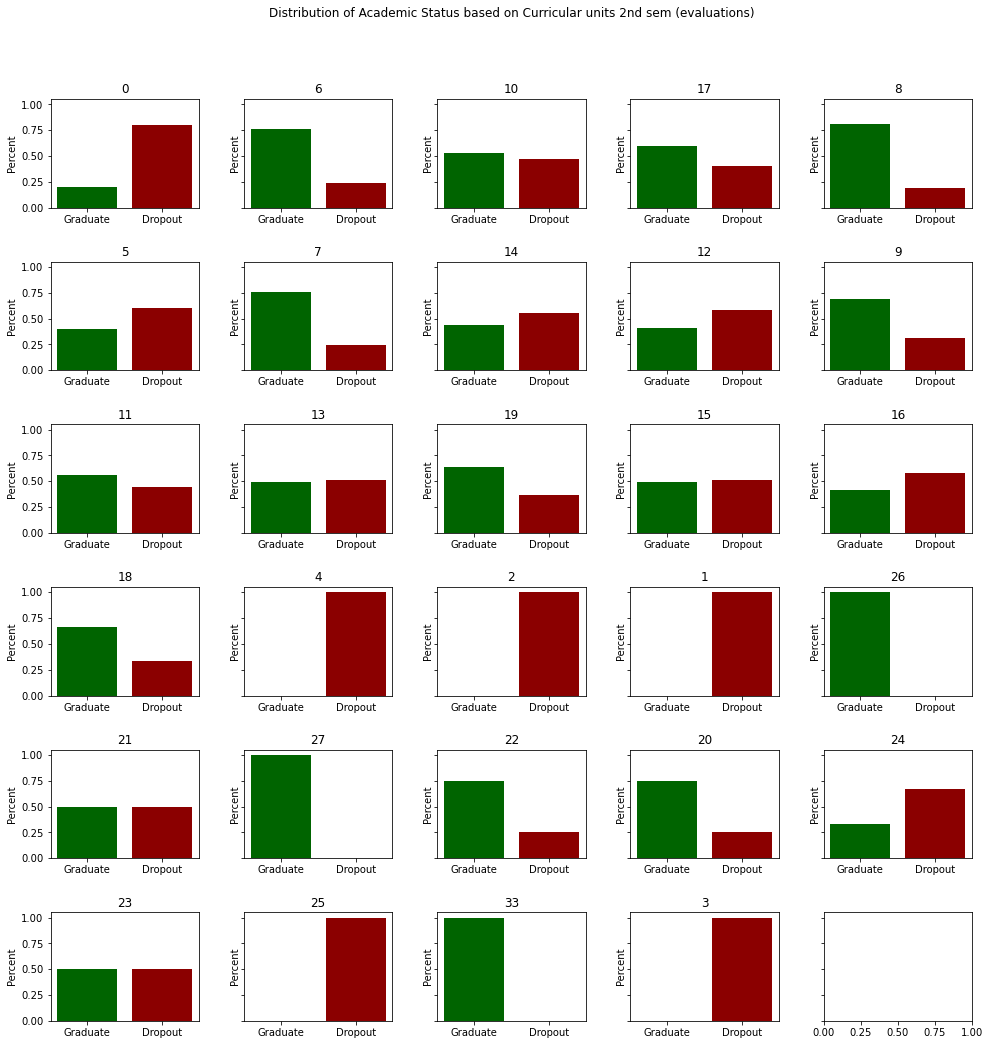

In [42]:
# select subset of dataset
col = df.columns[29]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant difference within some feature types**

Likely an influential feature

### Columns 30: Curricular units 2nd sem (approved)

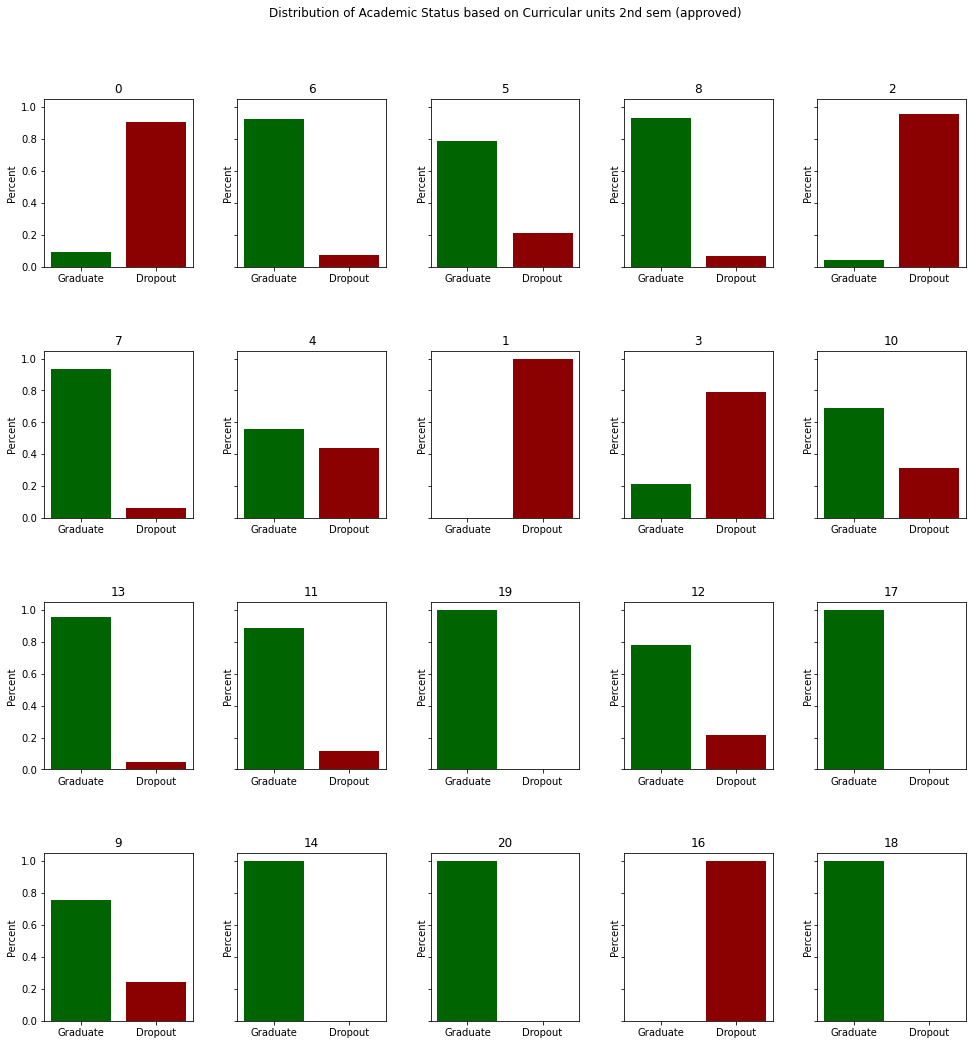

In [43]:
# select subset of dataset
col = df.columns[30]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 4
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant difference within some feature types**

Likely an influential feature

### Columns 31: Curricular units 2nd sem (grade)

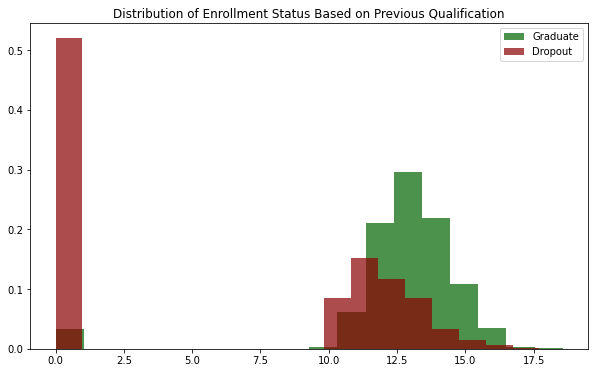

In [44]:
col = df.columns[31]

plt.figure(figsize=(10,6))
feature_ser = df[col]
for target_val in ['Graduate', 'Dropout']:
    plt.hist(feature_ser[df['Target'] == target_val], color=colors[target_val], alpha=.7, bins=18, label=target_val, density=True)
plt.title('Distribution of Enrollment Status Based on Previous Qualification')
plt.legend()
plt.show()

**Observation: Not much fluctuation within this feature (distributions are nearly the same)**

Probably not an influential feature

### Columns 32: Curricular units 2nd sem (without evaluations)

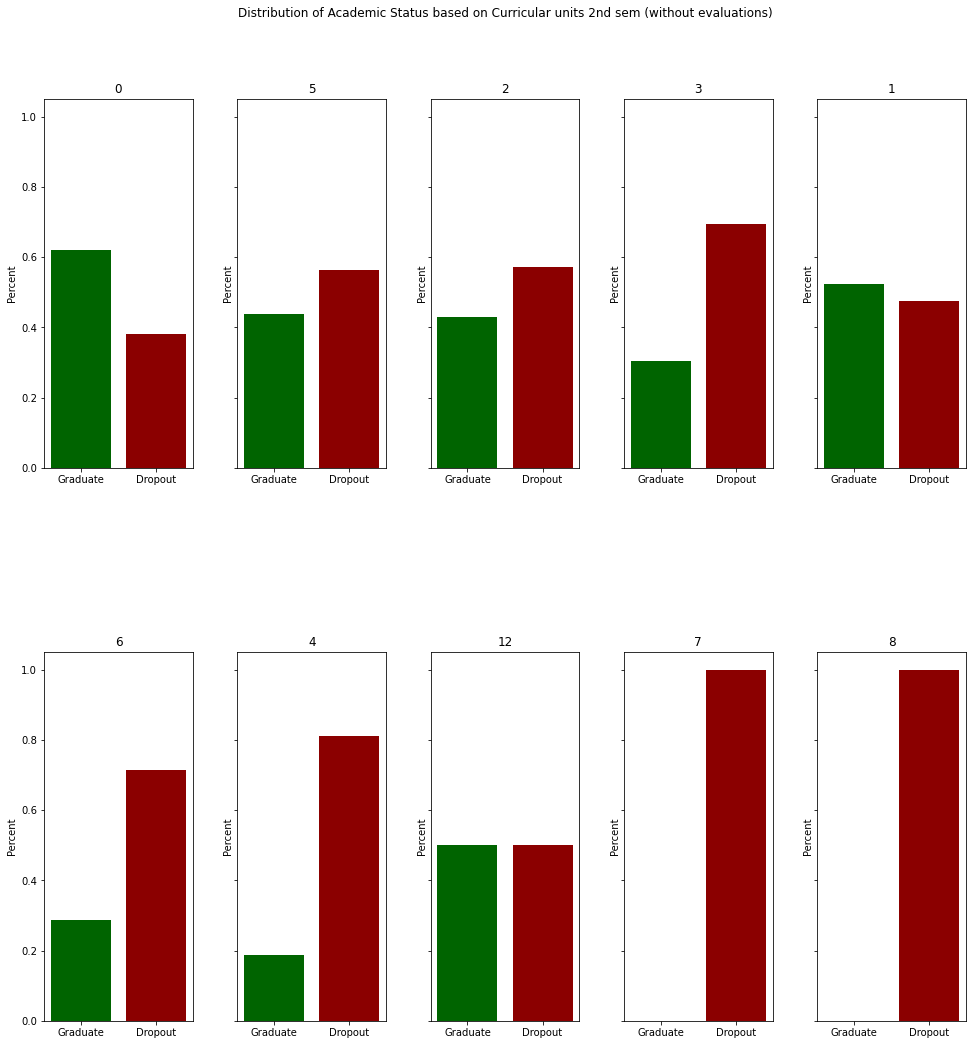

In [45]:
# select subset of dataset
col = df.columns[32]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant difference within some feature types**

Likely an influential feature

### Columns 33: Unemployment rate

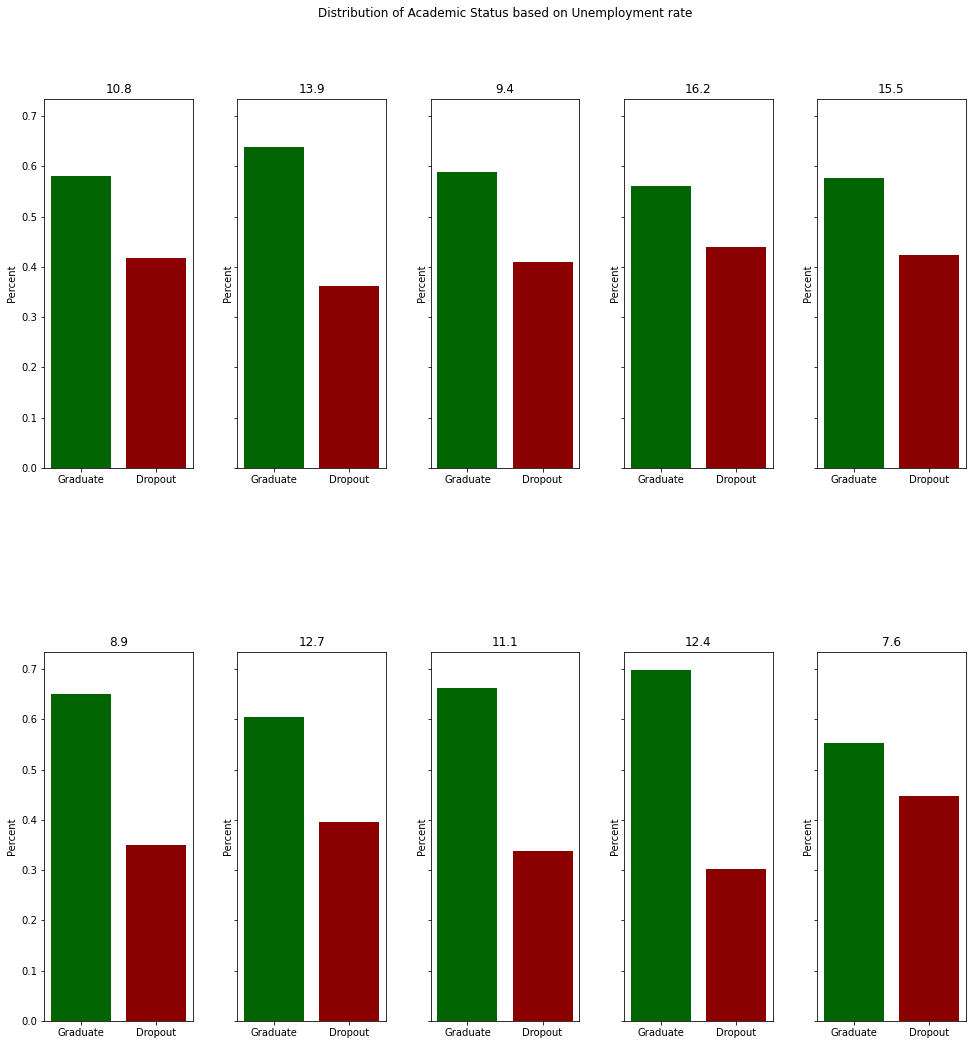

In [46]:
# select subset of dataset
col = df.columns[33]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Not much fluctuation within this feature**

Probably not an influential feature

### Columns 34: Inflation rate

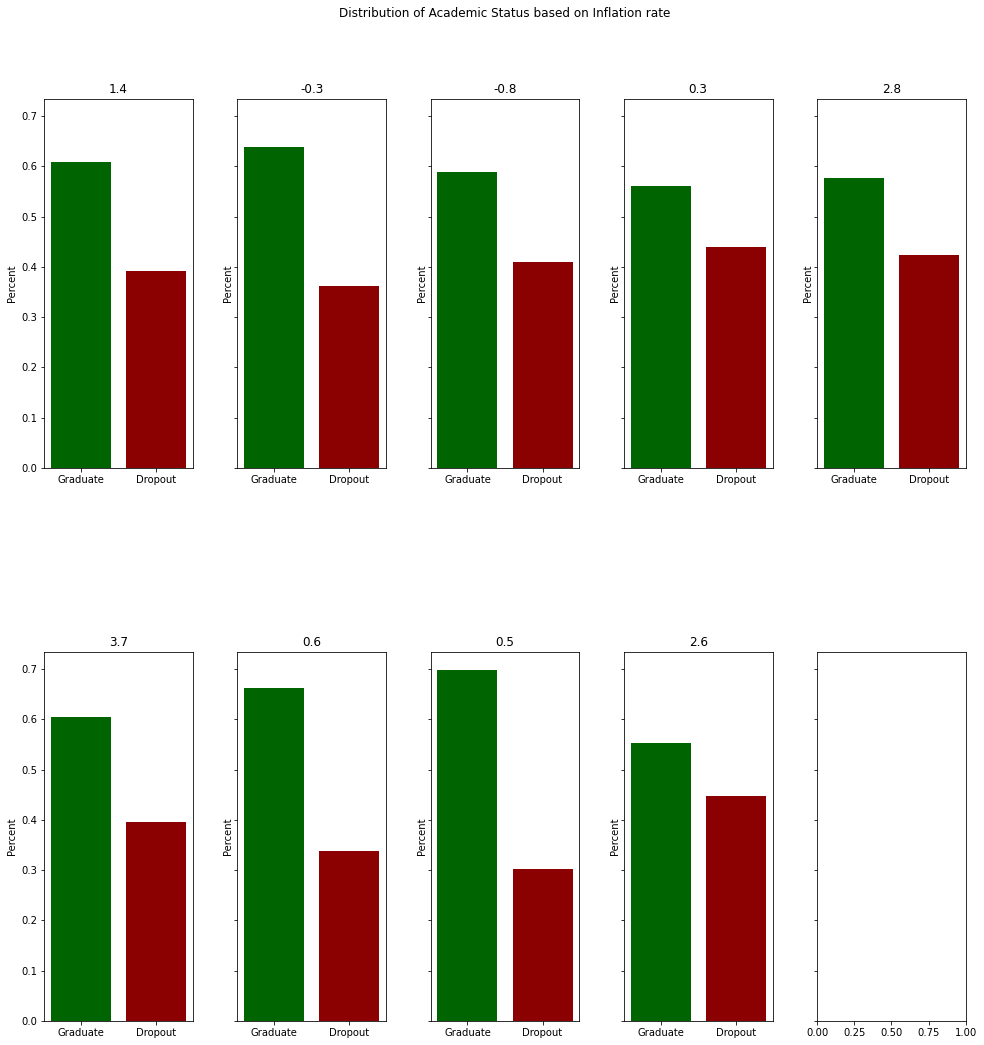

In [47]:
# select subset of dataset
col = df.columns[34]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate',  'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Not much fluctuation within this feature**

Probably not an influential feature

### Columns 35: GDP

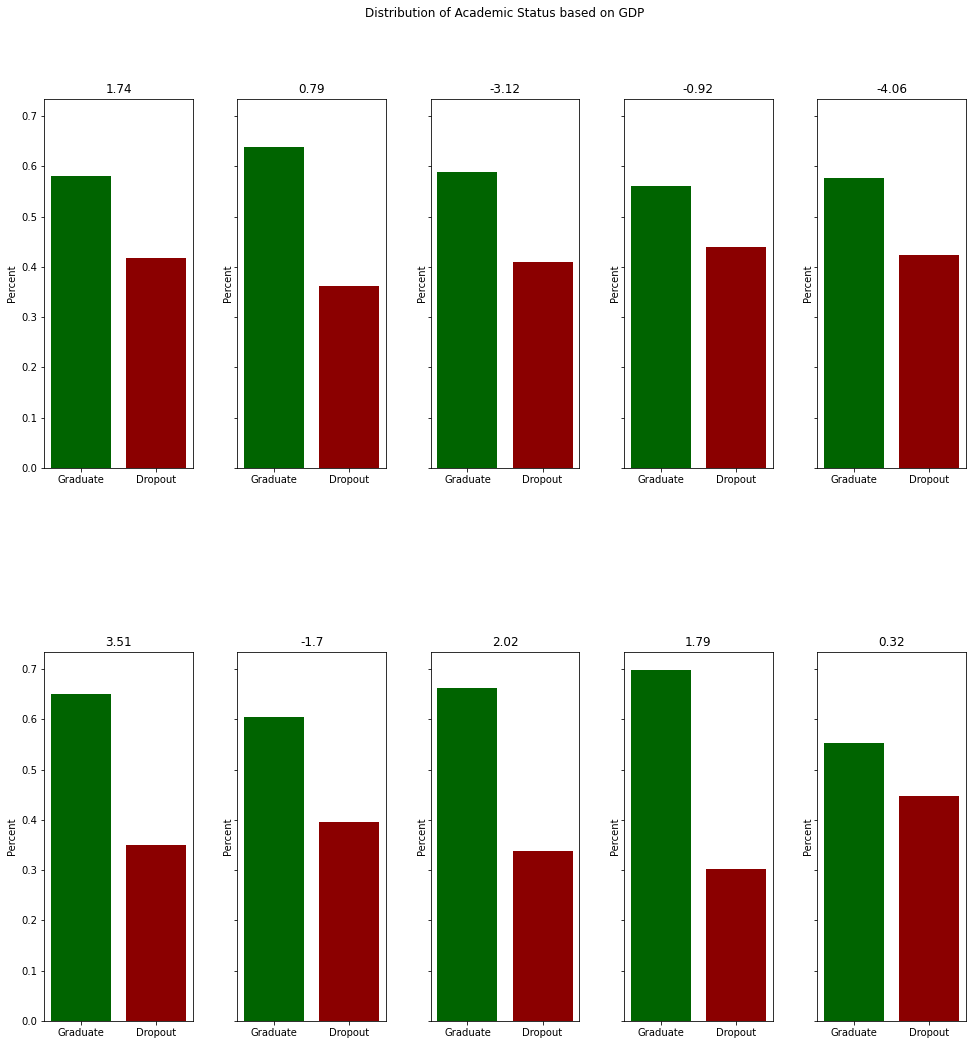

In [48]:
# select subset of dataset
col = df.columns[35]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Not much fluctuation within this feature**

Probably not an influential feature

### Summary on EDA for Columns 16-35:

- Columns #16; Tuition fees up to date: Likely
- Columns #17; Gender: Unlikely
- Columns #18; Scholarship holder: Likely
- Columns #19; Age at enrollment: Unlikely
- Columns #20; International: Unlikely
- Columns #21; Curricular units 1st sem (credited): Unlikely
- Columns #22; Curricular units 1st sem (enrolled): Likely
- Columns #23; Curricular units 1st sem (evaluations): Likely
- Columns #24; Curricular units 1st sem (approved): Likely
- Columns #25; Curricular units 1st sem (grade): Unlikely
- Columns #26; Curricular units 1st sem (without evaluations): Likely
- Columns #27; Curricular units 2nd sem (credited): Likely
- Columns #28; Curricular units 2nd sem (enrolled): Likely
- Columns #29; Curricular units 2nd sem (evaluations): Likely
- Columns #30; Curricular units 2nd sem (approved): Likely
- Columns #31; Curricular units 2nd sem (grade): Unlikely
- Columns #32; Curricular units 2nd sem (without evaluations): Likely
- Columns #33; Unemployment rate: Unlikely
- Columns #34; Inflation rate: Unlikely
- Columns #35; GDP: Unlikely


In [8]:
df

,Marital status,Application mode,Application order,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Displaced,Educational special needs,...,Gender,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Inflation rate,GDP,Target
0,1,17,5,1,1,19,12,5,1,0,...,1,0,0,0,0,0,0,1.4,1.74,Dropout
1,1,15,1,1,1,1,3,3,1,0,...,1,0,0,0,0,6,0,-0.3,0.79,Graduate
2,1,1,5,1,1,37,37,9,1,0,...,1,0,0,0,0,0,0,1.4,1.74,Dropout
3,1,17,2,1,1,38,37,5,1,0,...,0,0,0,0,0,5,0,-0.8,-3.12,Graduate
4,2,39,1,1,1,37,38,9,0,0,...,0,0,0,0,0,6,0,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,1,1,5,0,0,...,1,0,0,0,0,5,0,2.8,-4.06,Graduate
4420,1,1,2,1,105,1,1,9,1,0,...,0,0,1,0,0,2,0,0.6,2.02,Dropout
4421,1,1,1,1,1,37,37,9,1,0,...,0,1,0,0,0,1,0,-0.3,0.79,Dropout
4422,1,1,1,1,1,37,37,7,1,0,...,0,1,0,0,0,5,0,-0.8,-3.12,Graduate


In [34]:
likely_cls = ['Marital status','Application mode','Course','Previous qualification','Nacionality',
 "Father's qualification", "Mother's occupation","Father's occupation",
 'Debtor','Tuition fees up to date','Scholarship holder','Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
 'Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)','Curricular units 2nd sem (without evaluations)',
'Target']

df = df[likely_cls]
df

,Marital status,Application mode,Course,Previous qualification,Nacionality,Father's qualification,Mother's occupation,Father's occupation,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Target
0,1,17,171,1,1,12,5,9,0,1,...,0,0,0,0,0,0,0,0,0,Dropout
1,1,15,9254,1,1,3,3,3,0,0,...,6,6,6,0,0,6,6,6,0,Graduate
2,1,1,9070,1,1,37,9,9,0,0,...,6,0,0,0,0,6,0,0,0,Dropout
3,1,17,9773,1,1,37,5,3,0,1,...,6,8,6,0,0,6,10,5,0,Graduate
4,2,39,8014,1,1,38,9,9,0,1,...,6,9,5,0,0,6,6,6,0,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,9773,1,1,1,5,4,0,1,...,6,7,5,0,0,6,8,5,0,Graduate
4420,1,1,9773,1,105,1,9,9,1,0,...,6,6,6,0,0,6,6,2,0,Dropout
4421,1,1,9500,1,1,37,9,9,0,1,...,7,8,7,0,0,8,9,1,0,Dropout
4422,1,1,9147,1,1,37,7,4,0,1,...,5,5,5,0,0,5,6,5,0,Graduate


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns[:-1] 
    vif_data["VIF"] = [variance_inflation_factor(df.iloc[:, :-1].values, i) for i in range(len(df.columns) - 1)]
    return vif_data

remove_columns_count = 0
while True:
    vif_data = calculate_vif(df)
    vif_data = vif_data.sort_values("VIF", ascending=False)
    
    if vif_data.iloc[0, 1] < 5:
        break  
    
    column_to_remove = vif_data.iloc[0, 0]
    print(f"column to remove: {column_to_remove}")
    df = df.drop(columns=[column_to_remove])
    remove_columns_count+=1

print(f"remove_columns_count is {remove_columns_count}")
df

column to remove: Curricular units 1st sem (enrolled)
column to remove: Curricular units 2nd sem (enrolled)
column to remove: Curricular units 1st sem (approved)
column to remove: Curricular units 1st sem (evaluations)
column to remove: Course
column to remove: Curricular units 2nd sem (evaluations)
column to remove: Tuition fees up to date
column to remove: Father's occupation
remove_columns_count is 8


,Marital status,Application mode,Previous qualification,Nacionality,Father's qualification,Mother's occupation,Debtor,Scholarship holder,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Target
0,1,17,1,1,12,5,0,0,0,0,0,0,Dropout
1,1,15,1,1,3,3,0,0,0,0,6,0,Graduate
2,1,1,1,1,37,9,0,0,0,0,0,0,Dropout
3,1,17,1,1,37,5,0,0,0,0,5,0,Graduate
4,2,39,1,1,38,9,0,0,0,0,6,0,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,1,1,1,5,0,0,0,0,5,0,Graduate
4420,1,1,1,105,1,9,1,0,0,0,2,0,Dropout
4421,1,1,1,1,37,9,0,1,0,0,1,0,Dropout
4422,1,1,1,1,37,7,0,1,0,0,5,0,Graduate


## Model
### Logistic Regression

In [36]:
# Check the proportion of each target in the population
df['Target'].value_counts()/df.shape[0]

Target
Graduate    0.60854
Dropout     0.39146
Name: count, dtype: float64

In [37]:
# Convert to Binary for modeling
df['Target'] = df['Target'].map({'Graduate': 1, 'Dropout': 0})

['Marital status',
 'Application mode',
 'Application order',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Gender',
 'Scholarship holder',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (without evaluations)',
 'Inflation rate',
 'GDP',
 'Target']

12

In [11]:
df_cleaned = df[likely_cls]
df_cleaned.head()

,Marital status,Application mode,Course,Previous qualification,Nacionality,Father's qualification,Mother's occupation,Father's occupation,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Target
0,1,17,171,1,1,12,5,9,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,15,9254,1,1,3,3,3,0,0,...,6,6,6,0,0,6,6,6,0,1
2,1,1,9070,1,1,37,9,9,0,0,...,6,0,0,0,0,6,0,0,0,0
3,1,17,9773,1,1,37,5,3,0,1,...,6,8,6,0,0,6,10,5,0,1
4,2,39,8014,1,1,38,9,9,0,1,...,6,9,5,0,0,6,6,6,0,1


In [12]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('Target', axis = 1), 
                                                    df_cleaned['Target'], test_size=0.2, 
                                                    random_state=42)

In [13]:
df_train = pd.DataFrame()
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,Marital status,Application mode,Course,Previous qualification,Nacionality,Father's qualification,Mother's occupation,Father's occupation,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Target
1116,1,1,9070,1,1,38,1,9,0,0,...,5,5,0,0,0,6,0,0,0,0
4372,1,39,9003,1,1,12,9,9,0,1,...,6,7,0,0,0,6,10,0,0,0
4371,1,1,9500,1,1,19,3,3,0,1,...,7,7,7,0,0,8,8,8,0,1
2869,2,39,9991,19,1,37,9,9,0,1,...,5,5,5,0,0,5,5,5,0,1
1638,1,39,9670,9,1,37,5,3,1,1,...,5,5,0,0,0,5,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,1,42,9119,1,1,37,9,9,0,0,...,5,0,0,0,0,5,0,0,0,0
1559,1,1,9500,1,1,19,2,10,0,1,...,8,8,8,0,0,8,8,8,0,1
1037,1,1,9238,1,1,3,4,2,0,1,...,6,6,6,0,0,6,6,6,0,1
4278,1,1,9773,1,1,1,4,7,1,1,...,6,6,6,0,0,6,6,6,0,1


In [14]:
print(df_train.dtypes)

Marital status                                    int64
Application mode                                  int64
Course                                            int64
Previous qualification                            int64
Nacionality                                       int64
Father's qualification                            int64
Mother's occupation                               int64
Father's occupation                               int64
Debtor                                            int64
Tuition fees up to date                           int64
Scholarship holder                                int64
Curricular units 1st sem (enrolled)               int64
Curricular units 1st sem (evaluations)            int64
Curricular units 1st sem (approved)               int64
Curricular units 1st sem (without evaluations)    int64
Curricular units 2nd sem (credited)               int64
Curricular units 2nd sem (enrolled)               int64
Curricular units 2nd sem (evaluations)          

In [15]:
independent_vars = df_train.columns.difference(['Target']).tolist()

# Wrap column names with spaces or special characters
formula_parts = [f'Q("{x}")' if ' ' in x or '(' in x or ')' in x else x for x in df_train.columns.difference(['Target'])]
formula = 'Target ~ ' + ' + '.join(formula_parts)

In [16]:
base_logistic = smf.logit(formula=formula, data=df_train).fit()
print(base_logistic.summary())

Optimization terminated successfully.
         Current function value: 0.234110
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 2904
Model:                          Logit   Df Residuals:                     2883
Method:                           MLE   Df Model:                           20
Date:                Sun, 10 Mar 2024   Pseudo R-squ.:                  0.6508
Time:                        10:04:39   Log-Likelihood:                -679.86
converged:                       True   LL-Null:                       -1947.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                 

In [23]:
probabilities_l = base_logistic.predict(X_test)
predictions_l = (probabilities_l >= 0.5).astype(int)
accuracy = accuracy_score(y_test, predictions_l)
print("Accuracy:", accuracy)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predicted_labels)
print("F1 Score:", f1)

Accuracy: 0.9104683195592287
F1 Score: 0.9295774647887324


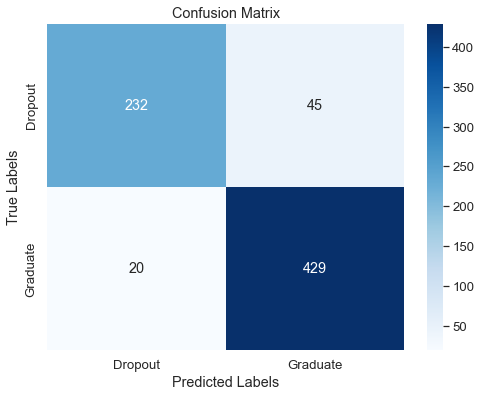

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout','Graduate'], yticklabels=['Dropout','Graduate'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Evaluate the preformance of logistic regression

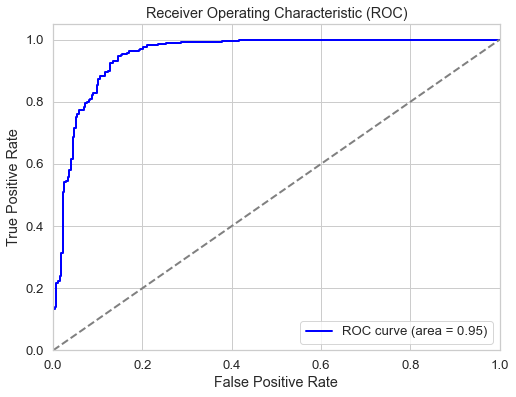

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probabilities_l)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### More Models - XGBOOST

In [47]:

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
xgb_clf = XGBClassifier(objective='multi:softmax', num_class=2, verbosity=1)

# Define our parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Smaller values make the model robust but slow to learn
    'max_depth': [4, 5, 6],  # Depth of the tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight(hessian) needed in a child
    'eta':[0.3,0.5]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='f1_weighted', n_jobs=-1, cv=3, verbose=3)

# Assuming X_train, y_train are defined as your feature matrix and target vector from your dataset
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score found: ", grid_search.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=4, min_child_weight=1;, score=0.886 total time=   0.7s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=4, min_child_weight=1;, score=0.896 total time=   0.7s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5;, score=0.890 total time=   0.7s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=4, min_child_weight=3;, score=0.897 total time=   0.7s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=4, min_child_weight=1;, score=0.888 total time=   0.7s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=4, min_child_weight=3;, score=0.893 total time=   0.7s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=4, min_child_weight=3;, score=0.888 total time=   0.7s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5;, score=0.893 total time=   0.7s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5;, score=

In [49]:
best_params = grid_search.best_params_

# Create a new XGBClassifier instance with the best parameters
best_xgb_clf = XGBClassifier(objective='multi:softmax', num_class=3, verbosity=1, **best_params)

# Train the classifier on the entire training set
best_xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, ...)

Accuracy: 0.8967
F1 Score: 0.90


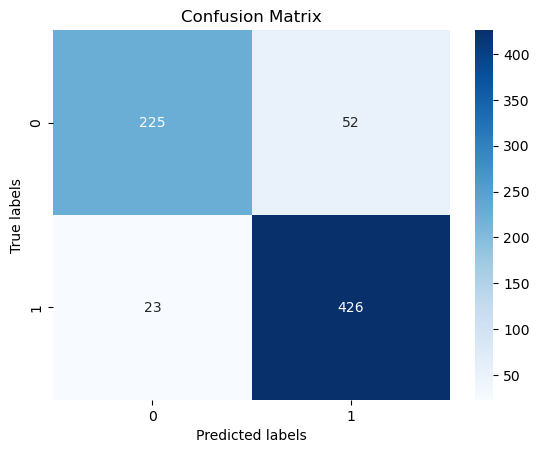

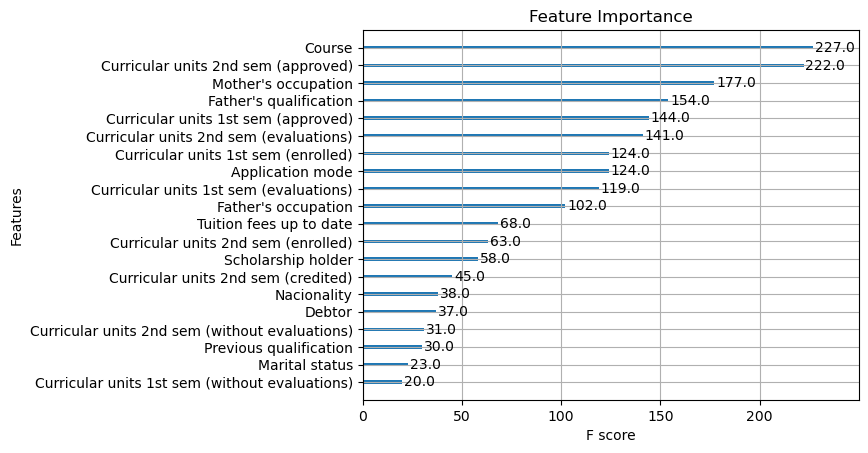

In [52]:
# Making predictions
predictions = best_xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')

f1 = f1_score(y_test, predictions, average='weighted')  # 'weighted' accounts for label imbalance.
print(f'F1 Score: {f1:.2f}')

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

xgb.plot_importance(best_xgb_clf)
plt.title('Feature Importance')
plt.show()


#### More Models - SVM

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Creating a SVM classifier using the RBF kernel
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.001, 0.01, 0.1, 1],
    'svm__kernel': ['rbf', 'linear', 'poly']
}
# Create a pipeline that scales the data then applies SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Predict with the best found parameters
y_pred = grid_search.predict(X_test)
print("Classification report for best parameters:")
print(classification_report(y_test, y_pred))

Best parameters: {'svm__C': 0.1, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}
Best cross-validation score: 0.91
Classification report for best parameters:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       277
           1       0.88      0.98      0.93       449

    accuracy                           0.90       726
   macro avg       0.92      0.88      0.90       726
weighted avg       0.91      0.90      0.90       726



In [54]:
best_params = grid_search.best_params_
adjusted_best_params = {key.replace('svm__', ''): value for key, value in best_params.items()}

# Create a new XGBClassifier instance with the best parameters
best_svm_clf = SVC(decision_function_shape='ovo',**adjusted_best_params)
# Train the classifier on the entire training set
best_svm_clf.fit(X_train, y_train)
print(f'Accuracy: {accuracy:.4f}')

f1 = f1_score(y_test, predictions, average='weighted')  # 'weighted' accounts for label imbalance.
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.8967
F1 Score: 0.90


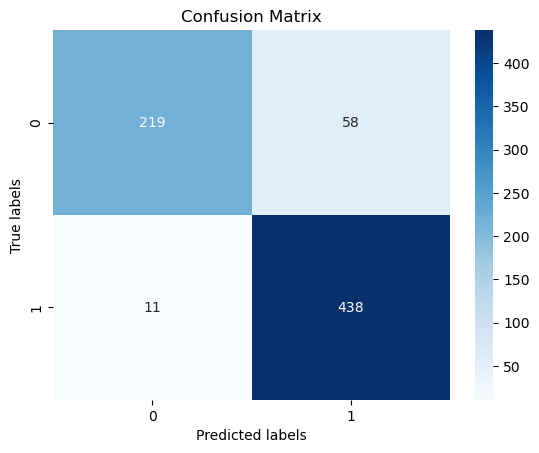

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## Result

In [60]:
## Discussion and Conclusion